### ADMISSION TABLE

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
import pandas as pd

# Load data
admissions = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')

In [221]:
# Print number of rows and columns
print('ADMISSIONS shape:', admissions.shape)

ADMISSIONS shape: (129, 19)


In [222]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [223]:
admissions.describe()

,row_id,subject_id,hadm_id,hospital_expire_flag,has_chartevents_data
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078,0.992248
std,14036.548988,16048.502883,27858.788248,0.464328,0.088045
min,12258.000000,10006.000000,100375.000000,0.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000,1.000000
50%,39869.000000,40310.000000,157235.000000,0.000000,1.000000
75%,40463.000000,42135.000000,174739.000000,1.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000,1.000000


In [224]:
#check data type
admissions.dtypes

row_id                   int64
subject_id               int64
hadm_id                  int64
admittime               object
dischtime               object
deathtime               object
admission_type          object
admission_location      object
discharge_location      object
insurance               object
language                object
religion                object
marital_status          object
ethnicity               object
edregtime               object
edouttime               object
diagnosis               object
hospital_expire_flag     int64
has_chartevents_data     int64
dtype: object

In [225]:
#check null values
admissions.isnull().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

In [226]:
admissions.duplicated().sum()

0

In [227]:
duplicated_rows = admissions[admissions['subject_id'].duplicated(keep=False)]

In [228]:
print(duplicated_rows.sort_values(by='subject_id'))


     row_id  subject_id  hadm_id            admittime            dischtime  \
20    12308       10059   142582  2150-08-07 21:40:00  2150-08-13 11:33:00   
21    12309       10059   122098  2150-08-22 17:33:00  2150-08-29 18:20:00   
30    12337       10088   169938  2107-01-04 11:59:00  2107-01-11 15:45:00   
31    12338       10088   168233  2107-01-29 04:00:00  2107-02-10 12:00:00   
32    12339       10088   149044  2107-05-12 18:00:00  2107-05-18 13:30:00   
36    12345       10094   168074  2180-02-29 18:54:00  2180-03-10 17:35:00   
37    12346       10094   122928  2180-03-15 22:35:00  2180-03-20 18:00:00   
46    12368       10117   187023  2138-06-05 17:23:00  2138-06-11 10:16:00   
47    12369       10117   105150  2138-11-09 18:08:00  2138-11-18 23:13:00   
48    12371       10119   157466  2117-08-05 18:27:00  2117-08-19 16:15:00   
49    12372       10119   165436  2117-08-21 06:58:00  2117-08-26 13:00:00   
52    12378       10124   170883  2192-04-16 20:57:00  2192-05-1

In [229]:
print(duplicated_rows['subject_id'].value_counts())


41976    15
10088     3
44083     3
10059     2
10094     2
10117     2
10119     2
10124     2
40124     2
40310     2
41795     2
42135     2
42346     2
43881     2
Name: subject_id, dtype: int64


<Axes: >

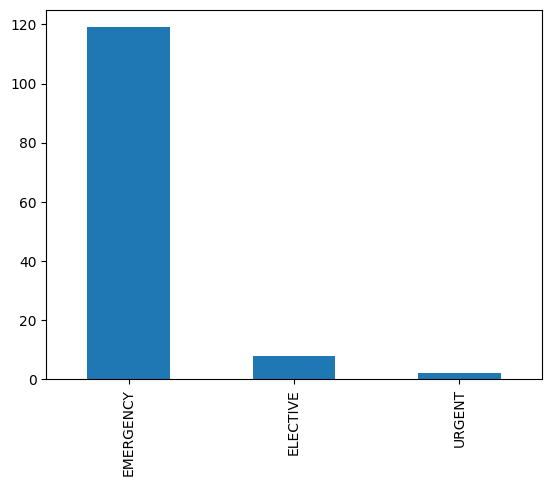

In [230]:
# Count by admission type
admissions.admission_type.value_counts().plot(kind='bar')

<Axes: >

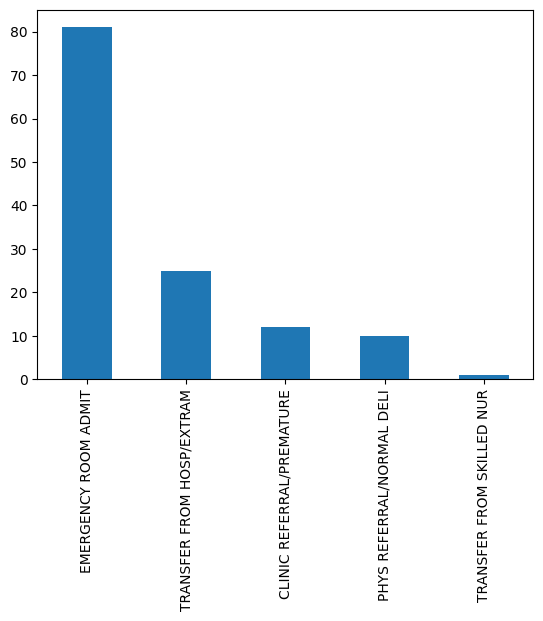

In [231]:
# Most common admission locations
admissions.admission_location.value_counts().head(10).plot(kind='bar')

<Axes: >

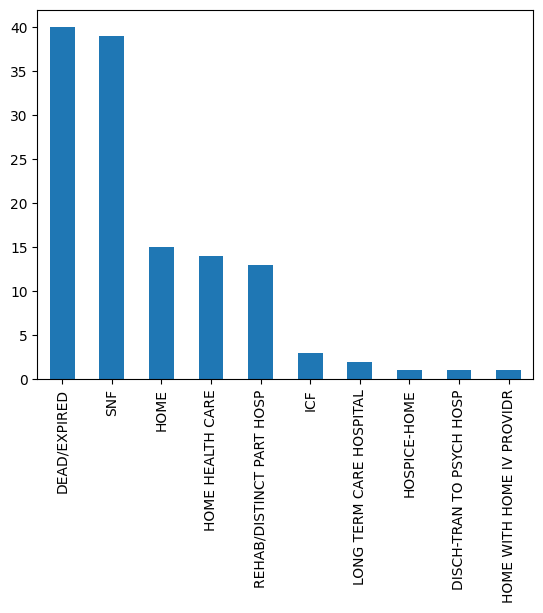

In [232]:
# Most common discharge locations
admissions.discharge_location.value_counts().head(10).plot(kind='bar')


<Axes: >

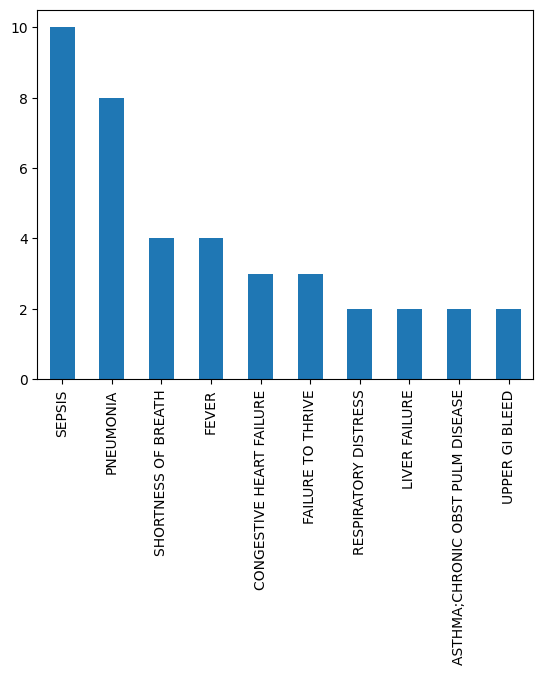

In [233]:
#value count by diagnosis
admissions.diagnosis.value_counts().head(10).plot(kind='bar')

<ipython-input-234-e89785828682>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = admissions.corr()


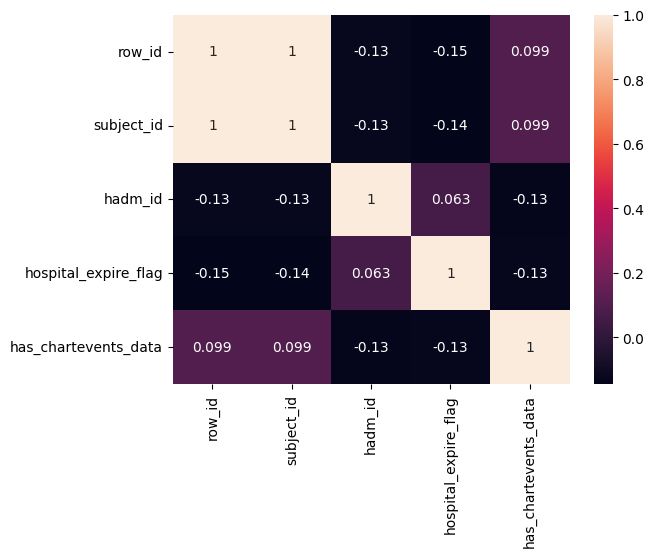

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix heatmap
corr_matrix = admissions.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Adding New Column LOS (Length of Stay) and Readmission

In [235]:
# Convert columns to datetimes
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

#Add LOS column
admissions['LOS'] = (admissions['dischtime'] - admissions['admittime']).dt.days

In [236]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,LOS
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,8
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1,13
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1,2
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,8
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1,0


In [237]:
import datetime

# Create READMISSION column
admissions['re_admission'] = 0
for i, row in admissions.iterrows():
    if i > 0:
        prev_discharge = admissions.iloc[i-1]['dischtime']
        time_since_discharge = row['admittime'] - prev_discharge
        if time_since_discharge <= datetime.timedelta(days=30):
            admissions.loc[i, 're_admission'] = 1

In [238]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,LOS,re_admission
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,8,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1,13,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1,2,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,8,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1,0,0


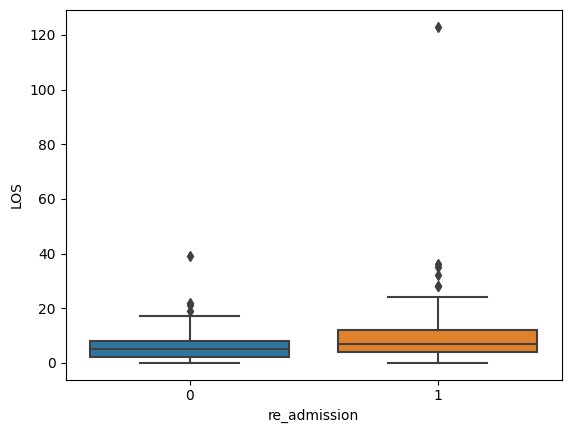

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of length of stay by readmission status
sns.boxplot(x='re_admission', y='LOS', data=admissions)
plt.show()

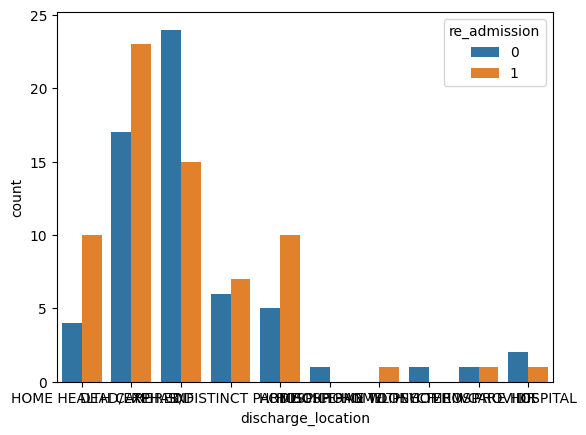

In [240]:
# Bar plot of discharge location by readmission status
sns.countplot(x='discharge_location', hue='re_admission', data=admissions)

plt.show()

In [241]:
# Average length of stay
print('Average Length of Stay:', admissions.LOS.mean())

Average Length of Stay: 8.775193798449612


In [242]:
# Number of readmissions
print('Number of readmissions:', sum(admissions.re_admission == 1))

Number of readmissions: 68


### Preprocessing

In [243]:
import pandas as pd

# Convert columns to appropriate dtypes
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

In [244]:
def calc_readmission(admissions):

    admissions['re_admission'] = 0

    for i, row in admissions.iterrows():

        if i > 0:
            current_admit = row['admittime']
            previous_discharge = admissions.iloc[i-1]['dischtime']

            time_between = current_admit - previous_discharge

            if time_between.days <= 30:
                admissions.loc[i, 're_admission'] = 1

    return admissions['re_admission']

In [245]:
# Add derived columns
admissions['LOS'] = (admissions['dischtime'] - admissions['admittime']).dt.days
admissions['re_admission'] = calc_readmission(admissions)

In [246]:
# Filter out admissions where patient died
#admissions = admissions[admissions['deathtime'].isnull()]

In [247]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,LOS,re_admission
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,8,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1,13,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1,2,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,8,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1,0,0


In [248]:
# Drop irrelevant columns
admissions = admissions.drop(columns=['row_id', 'insurance', 'marital_status', 'ethnicity','edregtime','edouttime','hospital_expire_flag','has_chartevents_data'])

In [249]:
# Drop irrelevant columns
admissions = admissions.drop(columns=['religion', 'deathtime', 'language'])

In [250]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,diagnosis,LOS,re_admission
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,8,0
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,13,1
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,2,1
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,8,0
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,0,0


In [251]:
# Fill NA values
admissions = admissions.fillna(method='ffill')

In [252]:
# Normalize continuous variables
admissions['LOS'] = (admissions['LOS'] - admissions['LOS'].mean()) / admissions['LOS'].std()

In [253]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,diagnosis,LOS,re_admission
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,-0.061052,0
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,0.332732,1
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,-0.533591,1
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,-0.061052,0
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,-0.691105,0


In [254]:
# One-hot encode categoricals
admissions = pd.get_dummies(admissions, columns=['admission_type'])

In [255]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,admission_location,discharge_location,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,-0.061052,0,0,1,0
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,0.332732,1,0,1,0
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,-0.533591,1,0,1,0
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,-0.061052,0,0,1,0
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,-0.691105,0,0,1,0


In [256]:
num_rows = admissions.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 129 rows.


In [257]:
#Create another dataset for train model
admissions_df = admissions

In [258]:
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,admission_location,discharge_location,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,-0.061052,0,0,1,0
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,0.332732,1,0,1,0
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,-0.533591,1,0,1,0
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,-0.061052,0,0,1,0
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,-0.691105,0,0,1,0


In [259]:
# Drop irrelevant columns
admissions_df = admissions_df.drop(columns=['admission_location', 'discharge_location'])

In [260]:
# Assuming 'admission_date' is the column with the date/timestamp
admissions_df = admissions_df.sort_values(by=['subject_id', 'admittime'], ascending=[True, False])
admissions_df = admissions_df.drop_duplicates(subset='subject_id', keep='first')

In [261]:
duplicated_rows = admissions_df[admissions_df['subject_id'].duplicated(keep=False)]

In [262]:
print(duplicated_rows['subject_id'].value_counts())

Series([], Name: subject_id, dtype: int64)


In [263]:
num_rows = admissions_df.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 100 rows.


In [264]:
admissions_df['subject_id'].duplicated().sum()

0

In [265]:
from datetime import timedelta

def check_readmits(admissions_df):
    readmits = []
    for i in range(1, len(admissions_df)):  # Start from 1 so we can always check i-1
        current_admit = admissions_df.iloc[i]['admittime']
        prev_discharge = admissions_df.iloc[i-1]['dischtime']
        if current_admit - prev_discharge <= timedelta(days=30):
            readmits.append(admissions_df.iloc[i])
    return readmits

# Add count column
admissions_df['readmission_count'] = 0

# Check subjects with 2+ admissions
for subject_id in admissions_df['subject_id'].unique():
    subject_df = admissions_df[admissions_df['subject_id'] == subject_id]
    if len(subject_df) >= 2:
        readmits = check_readmits(subject_df)
        original_indices = [row.name for row in readmits]  # Extract original indices from the filtered dataframe
        admissions_df.loc[original_indices, 'readmission_count'] = len(readmits)


In [266]:
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,readmission_count
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,SEPSIS,-0.061052,0,0,1,0,0
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,HEPATITIS B,0.332732,1,0,1,0,0
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,SEPSIS,-0.533591,1,0,1,0,0
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,HUMERAL FRACTURE,-0.061052,0,0,1,0,0
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,ALCOHOLIC HEPATITIS,-0.691105,0,0,1,0,0


In [267]:
# Drop irrelevant columns
admissions_df = admissions_df.drop(columns=['admittime', 'dischtime','readmission_count'])

In [268]:
admissions_df.head()

,subject_id,hadm_id,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT
0,10006,142345,SEPSIS,-0.061052,0,0,1,0
1,10011,105331,HEPATITIS B,0.332732,1,0,1,0
2,10013,165520,SEPSIS,-0.533591,1,0,1,0
3,10017,199207,HUMERAL FRACTURE,-0.061052,0,0,1,0
4,10019,177759,ALCOHOLIC HEPATITIS,-0.691105,0,0,1,0


In [269]:
admissions_df['subject_id'].duplicated().sum()

0

In [270]:
num_rows = admissions_df.shape[0]
print(f"The DataFrame has {num_rows} rows.")


The DataFrame has 100 rows.


### PATIENTS TABLE

In [271]:
import pandas as pd

# Load patients data
patients = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')

In [272]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [273]:
patients.shape

(100, 8)

In [274]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [275]:
patients.describe()

,row_id,subject_id,expire_flag
count,100.000000,100.000000,100.0
mean,20452.580000,26162.330000,1.0
std,10982.043163,16201.834705,0.0
min,9467.000000,10006.000000,1.0
25%,9526.500000,10068.500000,1.0
50%,20209.000000,25128.000000,1.0
75%,31391.250000,42276.500000,1.0
max,31872.000000,44228.000000,1.0


In [276]:
# Number of patients
print("Number of patients:", len(patients))

Number of patients: 100


In [277]:
# Count missing values
print(patients.isnull().sum())

row_id          0
subject_id      0
gender          0
dob             0
dod             0
dod_hosp       30
dod_ssn        23
expire_flag     0
dtype: int64


Note: Patients dataset not needed there are no relevant column that can be used for model training (subject_id already provided in the admission dataset)

### CPTEVENTS TABLE

In [278]:
import pandas as pd

# Load patients data
cptevents = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/CPTEVENTS.csv')

In [279]:
cptevents.head()

,row_id,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN


In [280]:
cptevents.shape

(1579, 12)

In [281]:
# Check for missing values
print(cptevents.isnull().sum())

row_id                 0
subject_id             0
hadm_id                0
costcenter             0
chartdate           1288
cpt_cd                 0
cpt_number             0
cpt_suffix          1579
ticket_id_seq        291
sectionheader          0
subsectionheader       0
description         1288
dtype: int64


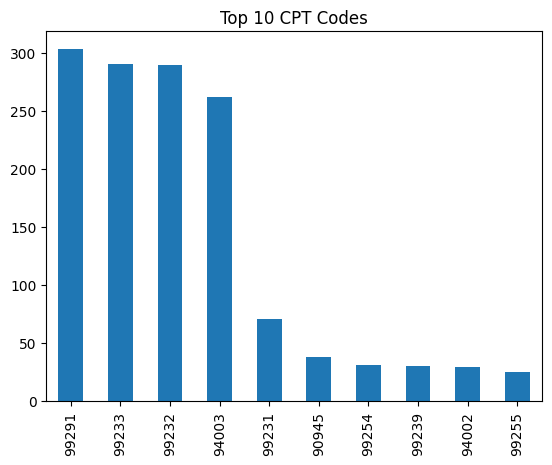

In [282]:
# Look at distribution of cpt_number
cptevents['cpt_number'].value_counts().head(10).plot.bar()
plt.title('Top 10 CPT Codes')
plt.xticks(rotation=90)
plt.show()

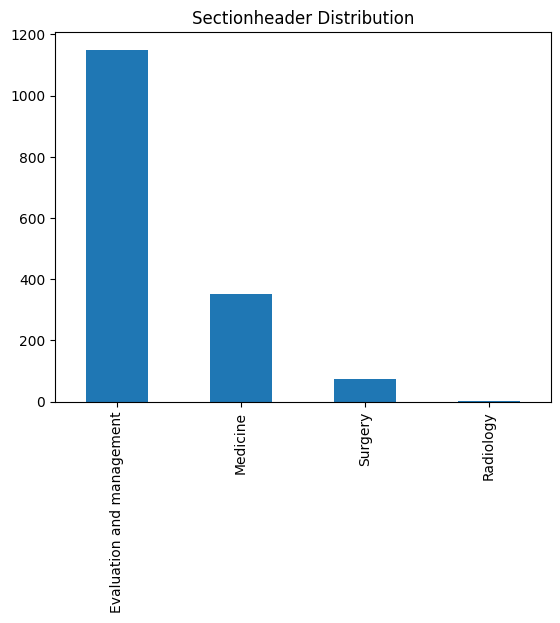

In [283]:
#distribution of sectionheader
cptevents['sectionheader'].value_counts().plot.bar()
plt.title('Sectionheader Distribution')
plt.xticks(rotation=90)
plt.show()

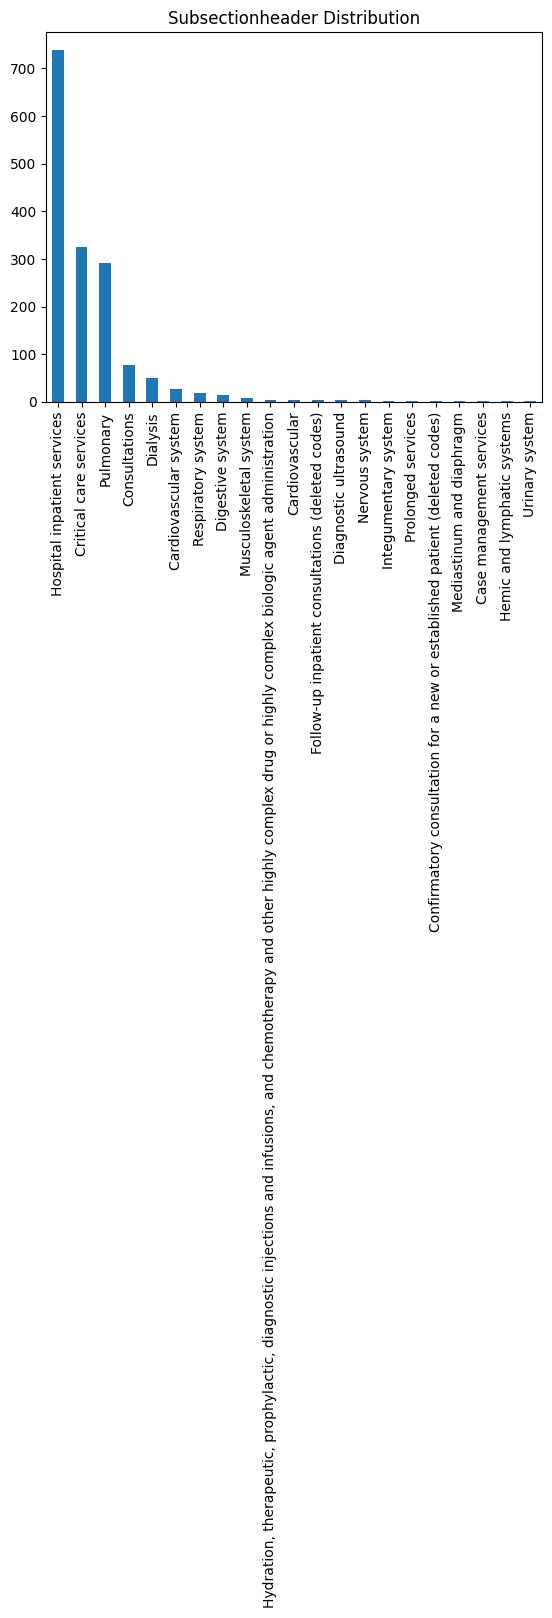

In [284]:
#distribution of subsectionheader
cptevents['subsectionheader'].value_counts().plot.bar()
plt.title('Subsectionheader Distribution')
plt.xticks(rotation=90)
plt.show()

ICU     1288
Resp     291
Name: costcenter, dtype: int64


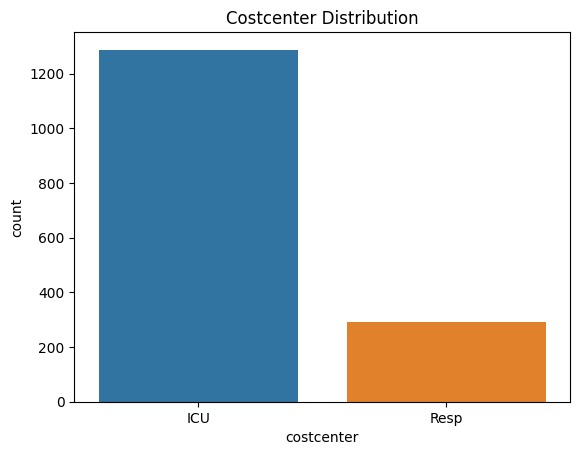

In [285]:
# Look at distribution of costcenter
print(cptevents['costcenter'].value_counts())
sns.countplot(x='costcenter', data=cptevents)
plt.title('Costcenter Distribution')
plt.show()

<ipython-input-286-0f0d63b747fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cptevents.corr()


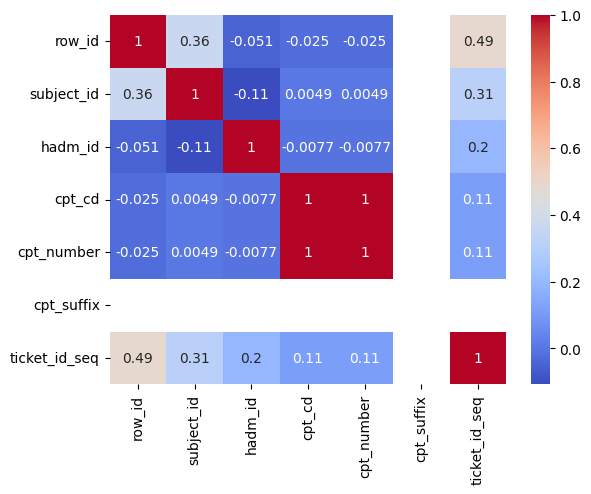

In [286]:
# Correlation heatmap for numeric columns
corr = cptevents.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### Preprocessing

In [287]:
cptevents.head()

,row_id,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN


In [288]:
unique_subject_ids = cptevents['subject_id'].nunique()
print(f"There are {unique_subject_ids} unique subject_id values in the cptevents dataframe.")

There are 91 unique subject_id values in the cptevents dataframe.


In [289]:
#Drop Irrelevant Column
cptevents = cptevents.drop(columns=['row_id', 'chartdate','cpt_cd','cpt_number','cpt_suffix','description'])

In [290]:
cptevents.head()

,subject_id,hadm_id,costcenter,ticket_id_seq,sectionheader,subsectionheader
0,10117,105150,ICU,1.0,Evaluation and management,Consultations
1,10117,105150,ICU,2.0,Evaluation and management,Hospital inpatient services
2,10117,105150,ICU,3.0,Medicine,Dialysis
3,10117,105150,ICU,4.0,Evaluation and management,Hospital inpatient services
4,10111,174739,ICU,1.0,Evaluation and management,Consultations


In [291]:
# Using pd.get_dummies to perform one-hot encoding
encoded_costcenter = pd.get_dummies(cptevents['costcenter'], prefix='costcenter')

# Join the encoded dataframe with the original dataframe
cptevents = pd.concat([cptevents, encoded_costcenter], axis=1)

# Optionally drop the original 'costcenter' column
cptevents = cptevents.drop('costcenter', axis=1)

print(cptevents)

      subject_id  hadm_id  ticket_id_seq              sectionheader  \
0          10117   105150            1.0  Evaluation and management   
1          10117   105150            2.0  Evaluation and management   
2          10117   105150            3.0                   Medicine   
3          10117   105150            4.0  Evaluation and management   
4          10111   174739            1.0  Evaluation and management   
...          ...      ...            ...                        ...   
1574       42281   195911            NaN                   Medicine   
1575       42302   167754            NaN                   Medicine   
1576       40595   116518            NaN                   Medicine   
1577       40595   116518            NaN                   Medicine   
1578       40687   129273            NaN                   Medicine   

                 subsectionheader  costcenter_ICU  costcenter_Resp  
0                   Consultations               1                0  
1     Hos

In [292]:
# Sorting dataframe based on subject_id and ticket_id_seq
cptevents = cptevents.sort_values(by=['subject_id', 'ticket_id_seq'])

# Custom aggregation function
def aggregate_sections(subsections, sections):
    aggregated_dict = {}
    for sub, sec in zip(subsections, sections):
        if sec not in aggregated_dict:
            aggregated_dict[sec] = []
        aggregated_dict[sec].append(sub)
    return aggregated_dict

# Aggregating data
aggregated = (cptevents.groupby('subject_id')
              .apply(lambda x: aggregate_sections(x['subsectionheader'], x['sectionheader']))
              .reset_index())
aggregated.columns = ['subject_id', 'section_subsection']

print(aggregated)


    subject_id                                 section_subsection
0        10006  {'Evaluation and management': ['Critical care ...
1        10013                        {'Medicine': ['Pulmonary']}
2        10017  {'Evaluation and management': ['Hospital inpat...
3        10019  {'Evaluation and management': ['Hospital inpat...
4        10026  {'Evaluation and management': ['Critical care ...
..         ...                                                ...
86       44083  {'Evaluation and management': ['Hospital inpat...
87       44154  {'Evaluation and management': ['Critical care ...
88       44212  {'Surgery': ['Cardiovascular system', 'Cardiov...
89       44222  {'Evaluation and management': ['Hospital inpat...
90       44228  {'Evaluation and management': ['Hospital inpat...

[91 rows x 2 columns]


In [293]:
# Merge aggregated data
cptevents = pd.merge(cptevents, aggregated, on='subject_id', how='left', suffixes=('', '_agg'))


In [294]:
cptevents.head()

,subject_id,hadm_id,ticket_id_seq,sectionheader,subsectionheader,costcenter_ICU,costcenter_Resp,section_subsection
0,10006,142345,22.0,Evaluation and management,Critical care services,1,0,{'Evaluation and management': ['Critical care ...
1,10006,142345,23.0,Evaluation and management,Critical care services,1,0,{'Evaluation and management': ['Critical care ...
2,10006,142345,24.0,Evaluation and management,Hospital inpatient services,1,0,{'Evaluation and management': ['Critical care ...
3,10006,142345,25.0,Evaluation and management,Hospital inpatient services,1,0,{'Evaluation and management': ['Critical care ...
4,10013,165520,NaN,Medicine,Pulmonary,0,1,{'Medicine': ['Pulmonary']}


In [295]:
#Drop Irrelevant Column
cptevents = cptevents.drop(columns=['sectionheader', 'ticket_id_seq','subsectionheader'])

In [296]:
cptevents.head()

,subject_id,hadm_id,costcenter_ICU,costcenter_Resp,section_subsection
0,10006,142345,1,0,{'Evaluation and management': ['Critical care ...
1,10006,142345,1,0,{'Evaluation and management': ['Critical care ...
2,10006,142345,1,0,{'Evaluation and management': ['Critical care ...
3,10006,142345,1,0,{'Evaluation and management': ['Critical care ...
4,10013,165520,0,1,{'Medicine': ['Pulmonary']}


In [297]:
num_rows = cptevents.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 1579 rows.


In [298]:
unique_subject_ids = cptevents['subject_id'].nunique()
print(f"There are {unique_subject_ids} unique subject_id values in the cptevents dataframe.")

There are 91 unique subject_id values in the cptevents dataframe.


In [299]:
duplicated_rows = cptevents[cptevents['subject_id'].duplicated(keep=False)]

In [300]:
print(duplicated_rows['subject_id'].value_counts())

40310    216
41976    116
44212     88
42135     82
10124     76
        ... 
10101      2
10042      2
10089      2
44222      2
10093      2
Name: subject_id, Length: 87, dtype: int64


In [301]:
import numpy as np
# Example: aggregating numerical columns by mean and categorical columns by mode
aggregation_functions = {}
for column in cptevents.columns:
    if column != 'subject_id':
        if np.issubdtype(cptevents[column].dtype, np.number):
            aggregation_functions[column] = 'mean'
        else:
            aggregation_functions[column] = lambda x: x.mode()[0] if not x.mode().empty else np.nan

aggregated_cptevents = cptevents.groupby('subject_id').agg(aggregation_functions).reset_index()


In [302]:
aggregated_cptevents.head()

,subject_id,hadm_id,costcenter_ICU,costcenter_Resp,section_subsection
0,10006,142345.0,1.0,0.0,{'Evaluation and management': ['Critical care ...
1,10013,165520.0,0.0,1.0,{'Medicine': ['Pulmonary']}
2,10017,199207.0,1.0,0.0,{'Evaluation and management': ['Hospital inpat...
3,10019,177759.0,0.8,0.2,{'Evaluation and management': ['Hospital inpat...
4,10026,103770.0,1.0,0.0,{'Evaluation and management': ['Critical care ...


In [303]:
num_rows = aggregated_cptevents.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 91 rows.


### LABEVENTS

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [305]:
# Import Datasets
df_labevents=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/LABEVENTS.csv')
df_labitems=pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv')

# Load relevant tables
df_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv')
df_d_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv')

#### EDA Lab Events

In [306]:
df_labevents.head()

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal


In [307]:
df_labevents.shape

(76074, 9)

In [308]:
df_labevents.dtypes

row_id          int64
subject_id      int64
hadm_id       float64
itemid          int64
charttime      object
value          object
valuenum      float64
valueuom       object
flag           object
dtype: object

In [309]:
df_labevents.isnull().sum()

row_id            0
subject_id        0
hadm_id       14262
itemid            0
charttime         0
value             4
valuenum       9044
valueuom       9405
flag          46337
dtype: int64

In [310]:
df_labevents.duplicated().sum()

0

In [311]:
df_labevents['hadm_id'].isnull().sum()

14262

In [312]:
df_labitems.head()

,row_id,itemid,label,fluid,category,loinc_code
0,1,50800,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
1,2,50801,Alveolar-arterial Gradient,Blood,Blood Gas,19991-9
2,3,50802,Base Excess,Blood,Blood Gas,11555-0
3,4,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6
4,5,50804,Calculated Total CO2,Blood,Blood Gas,34728-6


In [313]:
df_labitems.shape

(753, 6)

In [314]:
df_labevents['itemid'].duplicated().sum()

75635

In [315]:
df_labitems.duplicated().sum()

0

In [316]:
df_labitems = df_labitems.drop('row_id', axis=1)
df_labevents = df_labevents.drop('row_id', axis=1)

In [317]:
df_lab = pd.merge(df_labitems, df_labevents, on='itemid', how='inner')

In [318]:
df_lab.tail()

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
76069,51523,GR HOLD,URINE,CHEMISTRY,NaN,44228,103379.0,2170-12-15 03:20:00,HOLD,NaN,NaN,NaN
76070,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY,NaN,43927,NaN,2176-04-08 09:50:00,120,120.0,mg/dL,NaN
76071,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY,NaN,44222,NaN,2181-03-02 07:54:00,263,263.0,mg/dL,abnormal
76072,51533,WBCP,BLOOD,HEMATOLOGY,NaN,42458,NaN,2147-03-22 14:20:00,5,5.0,%,NaN
76073,51537,TDT,OTHER BODY FLUID,HEMATOLOGY,NaN,40310,157609.0,2144-12-25 23:18:00,DONE,NaN,NaN,NaN


In [319]:
df_lab.shape

(76074, 12)

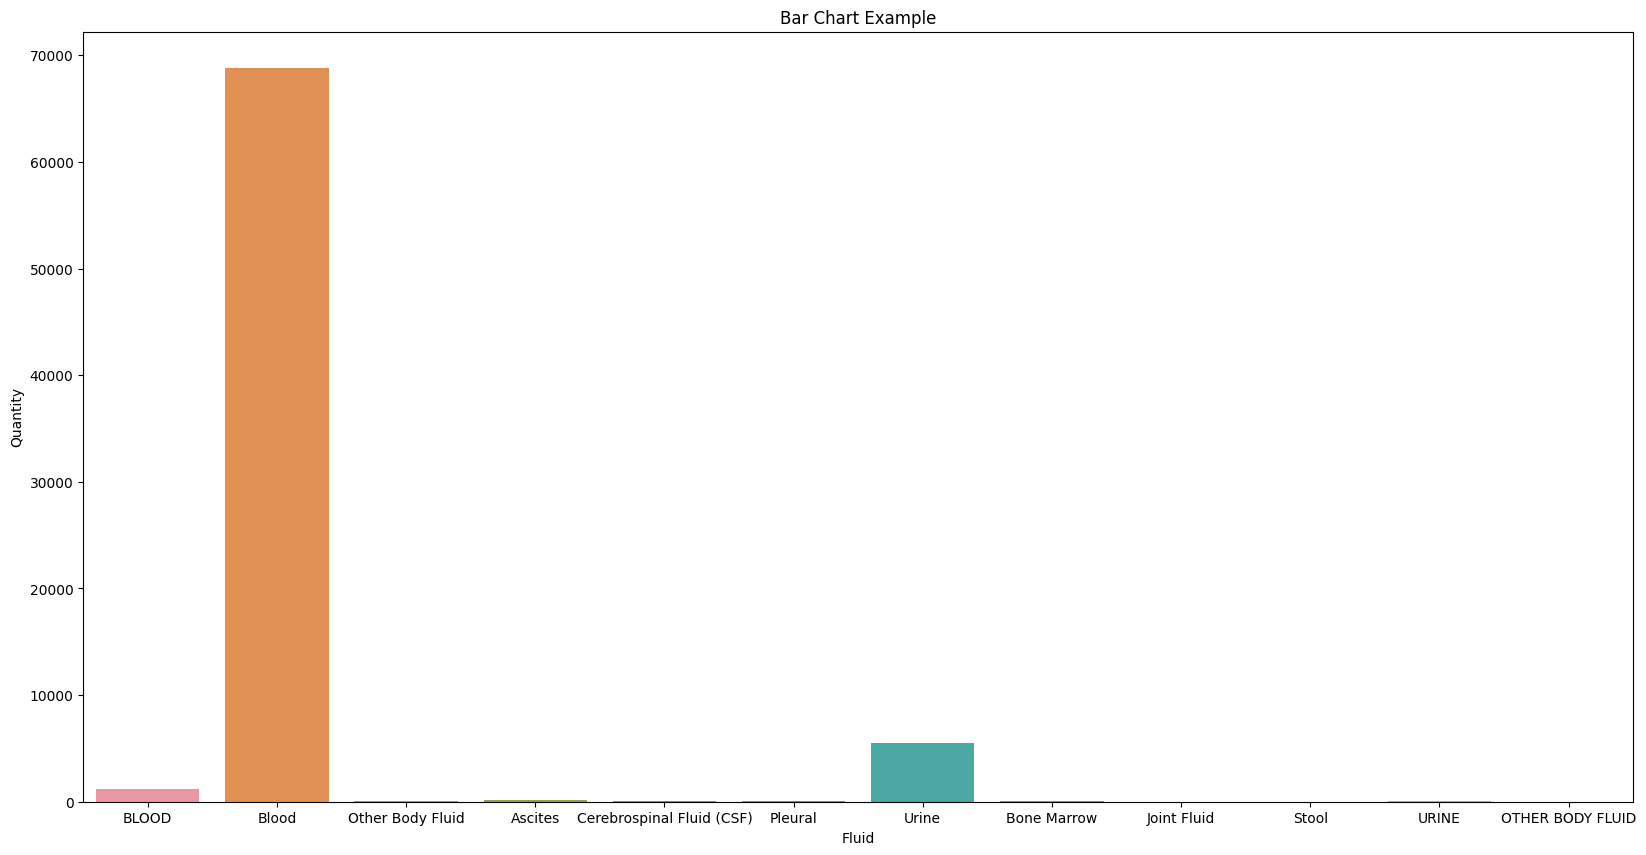

In [320]:
plt.figure(figsize=(20, 10))

sns.countplot(x='fluid', data=df_lab)

# Add labels and a title
plt.xlabel('Fluid')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()


In [321]:
df_lab['fluid'] = df_lab['fluid'].str.lower()

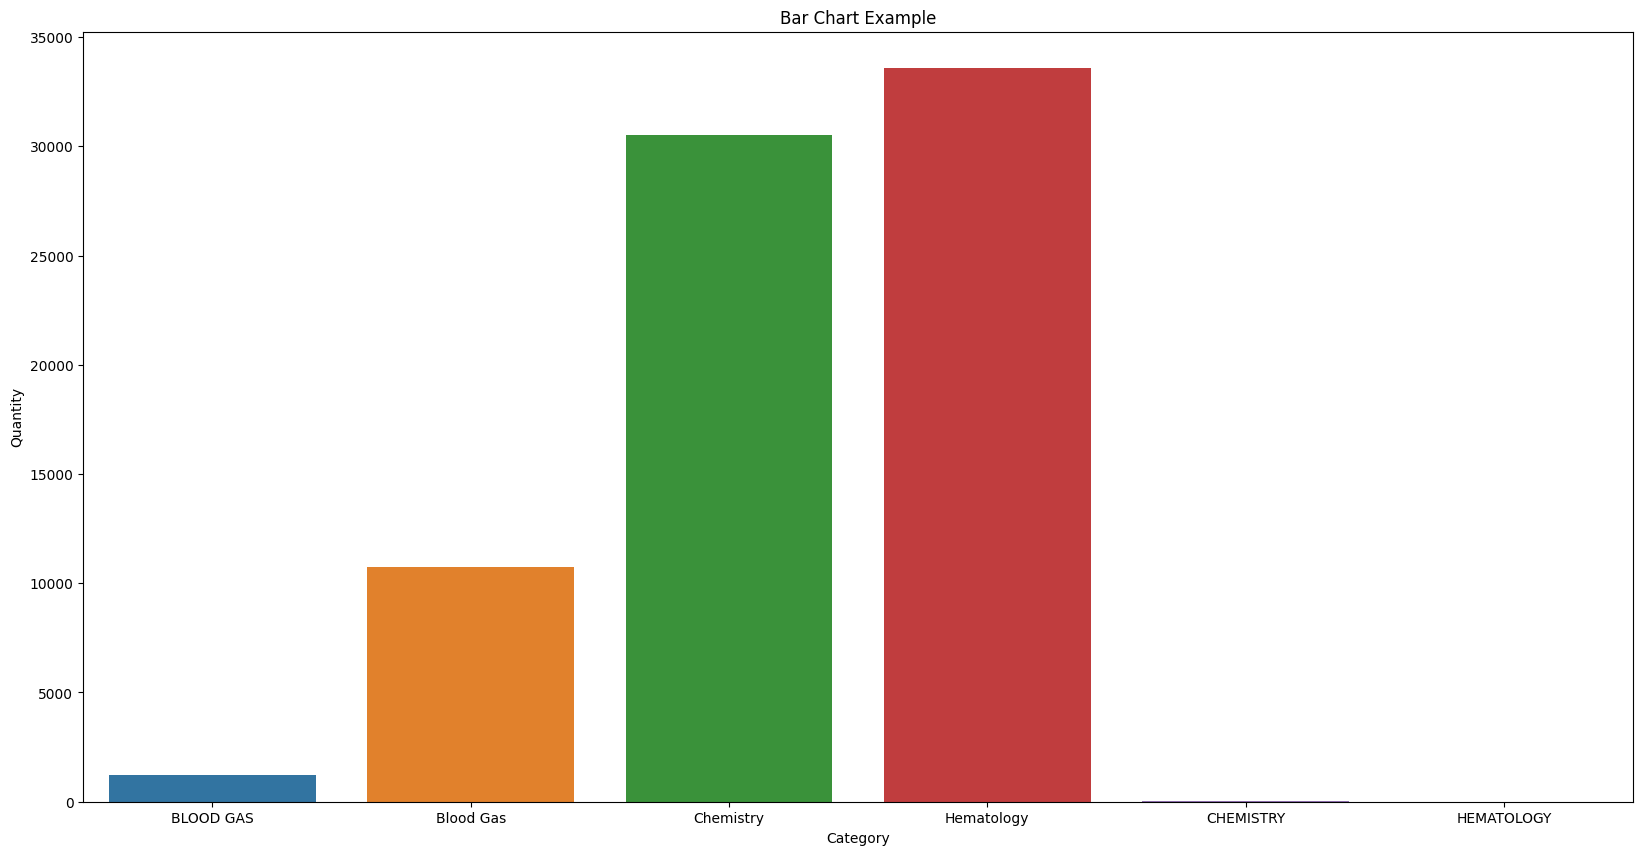

In [322]:
plt.figure(figsize=(20, 10))

sns.countplot(x='category', data=df_lab)

# Add labels and a title
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

In [323]:
df_lab['category'] =df_lab['category'].str.lower()

In [324]:
unique_values = df_lab['label'].unique()

In [325]:
unique_values

array(['SPECIMEN TYPE', 'Alveolar-arterial Gradient', 'Base Excess',
       'Calculated Bicarbonate, Whole Blood', 'Calculated Total CO2',
       'Carboxyhemoglobin', 'Chloride, Whole Blood', 'Free Calcium',
       'Glucose', 'Hematocrit, Calculated', 'Hemoglobin', 'Intubated',
       'Lactate', 'Methemoglobin', 'O2 Flow', 'Oxygen',
       'Oxygen Saturation', 'pCO2', 'PEEP', 'pH', 'pO2',
       'Potassium, Whole Blood', 'Required O2', 'Sodium, Whole Blood',
       'Temperature', 'Tidal Volume', 'Ventilation Rate', 'Ventilator',
       'Albumin, Ascites', 'Amylase, Ascites',
       'Bilirubin, Total, Ascites', 'Creatinine, Ascites',
       'Glucose, Ascites', 'Lactate Dehydrogenase, Ascites',
       'Total Protein, Ascites', '% Hemoglobin A1c', '25-OH Vitamin D',
       'Absolute A1c', 'Absolute Hemoglobin', 'Acetaminophen', 'Acetone',
       'Alanine Aminotransferase (ALT)', 'Albumin',
       'Alkaline Phosphatase', 'Alpha-Fetoprotein', 'Ammonia', 'Amylase',
       'Anion Gap', 'Anti-

In [326]:
df_lab['label'].value_counts()

Glucose                 2689
Hematocrit              2317
Potassium               2279
Sodium                  2185
Creatinine              2175
                        ... 
Eosinophil Count           1
CD4/CD8 Ratio              1
Blood Parasite Smear       1
CA-125                     1
TDT                        1
Name: label, Length: 373, dtype: int64

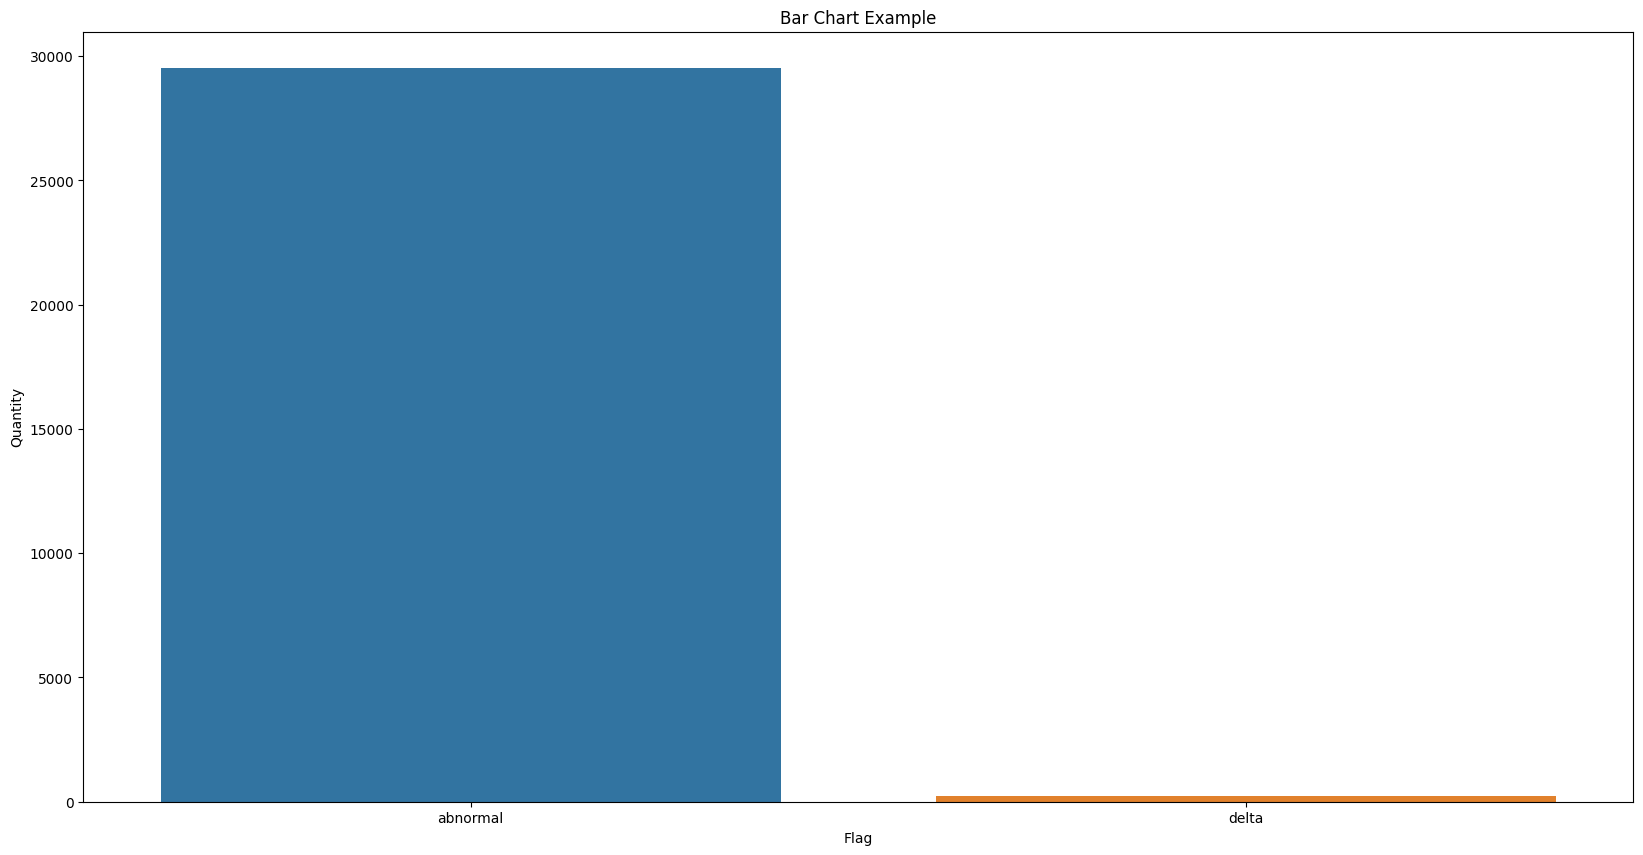

In [327]:
plt.figure(figsize=(20, 10))

sns.countplot(x='flag', data=df_lab)

# Add labels and a title
plt.xlabel('Flag')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

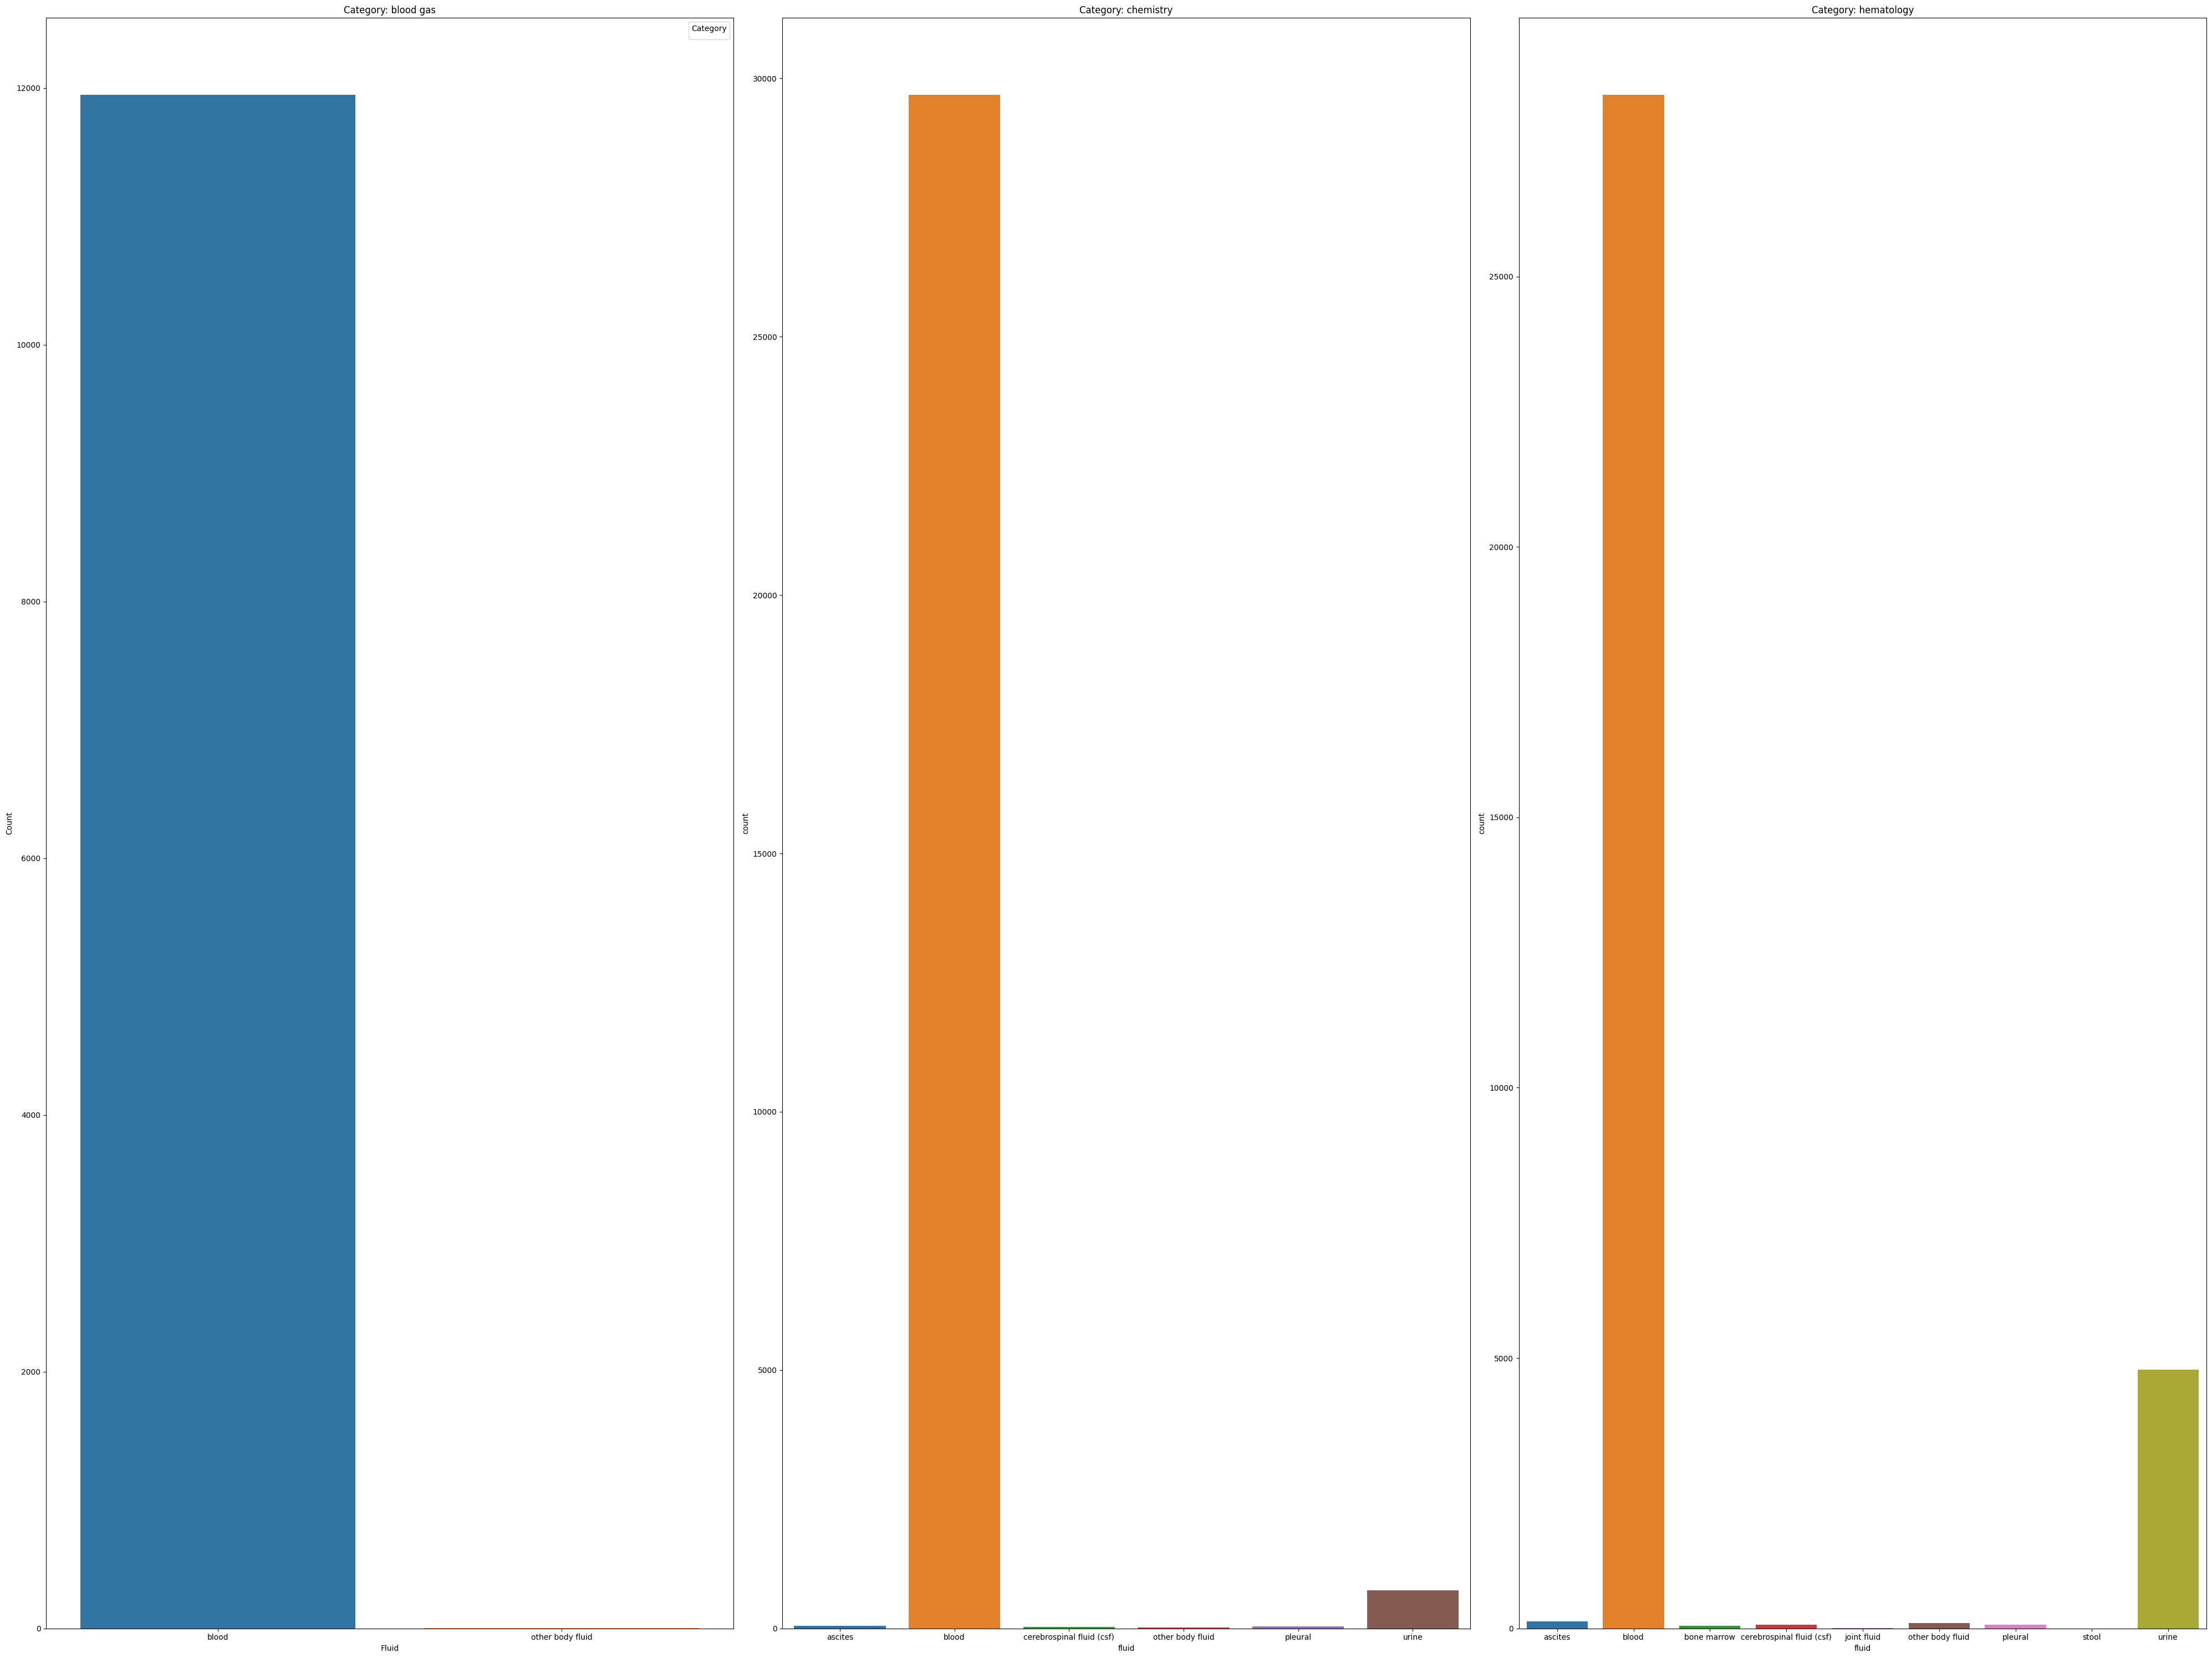

In [328]:
# Create subplots with three columns
fig, axes = plt.subplots(1, 3, figsize=(40,30))

# Iterate through each unique category
categories = df_lab['category'].unique()
for i, category in enumerate(categories):
    # Filter the DataFrame for the current category
    subset_df = df_lab[df_lab['category'] == category]

    # Create a grouped countplot for the current category
    sns.countplot(data=subset_df, x='fluid', ax=axes[i])

    # Set the title for the subplot
    axes[i].set_title(f'Category: {category}')

    # Add labels and a legend to the first subplot only
    if i == 0:
        axes[i].set_xlabel('Fluid')
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Category')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [329]:
df_lab['flag'].fillna('normal', inplace=True)

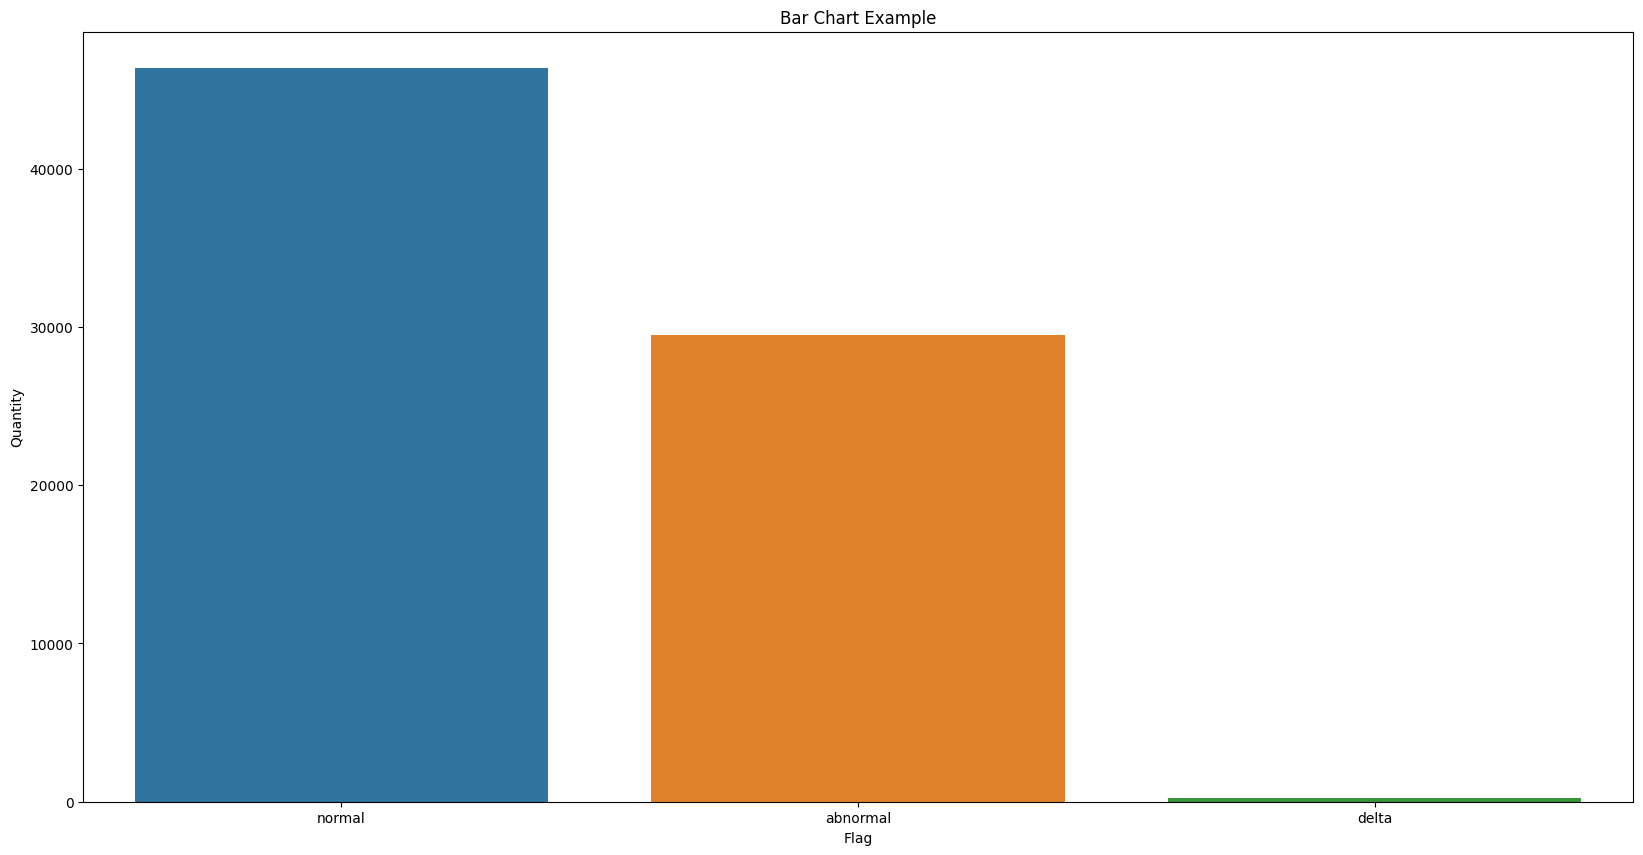

In [330]:
plt.figure(figsize=(20, 10))

sns.countplot(x='flag', data=df_lab)

# Add labels and a title
plt.xlabel('Flag')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

In [331]:
df_lab['subject_id'].nunique()

100

In [332]:
df_lab["itemid"].isnull().sum()

0

In [333]:
unit=df_lab['valueuom'].unique()

In [334]:
len(unit)

47

In [335]:
print(unit)

[nan 'mm Hg' 'mEq/L' 'MEQ/L' '%' 'mmol/L' 'mg/dL' 'g/dL' 'L/min' 'MM HG'
 'units' 'UNITS' 'IU/L' 'ng/mL' 'ug/mL' 'umol/L' 'mg/L' 'U/mL' 'Ratio'
 'ug/dL' 'ng/ml' 'mIU/mL' 'MG/DL' 'Pos/Neg' 'pg/mL' 'MOSM/KG' 'mOsm/kg'
 'ng/dL' 'uU/ML' 'uIU/mL' 'mg/g' 'U/L' '+/-' 'mL' '#/uL' 'pg' 'fL' 'K/uL'
 'sec' 'SECONDS' 'U/g/Hb' 'm/uL' 'mm/hr' ' ' 'EU/dL' '#/hpf' '#/lpf']


In [336]:
len(df_lab['itemid'].unique())

439

In [337]:
df_lab= df_lab[df_lab['fluid'].isin(['urine', 'blood'])]

In [338]:
df_lab.head()

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
0,50800,SPECIMEN TYPE,blood,blood gas,NaN,10006,NaN,2164-10-02 08:26:00,ART,NaN,NaN,normal
1,50800,SPECIMEN TYPE,blood,blood gas,NaN,10006,NaN,2164-11-16 03:05:00,ART,NaN,NaN,normal
2,50800,SPECIMEN TYPE,blood,blood gas,NaN,10006,NaN,2165-06-02 22:28:00,ART,NaN,NaN,normal
3,50800,SPECIMEN TYPE,blood,blood gas,NaN,10011,105331.0,2126-08-15 04:25:00,ART,NaN,NaN,normal
4,50800,SPECIMEN TYPE,blood,blood gas,NaN,10011,105331.0,2126-08-17 22:23:00,ART,NaN,NaN,normal


In [339]:
df_lab.tail()

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
76068,51523,GR HOLD,urine,chemistry,NaN,44154,174245.0,2178-05-14 16:45:00,HOLD,NaN,NaN,normal
76069,51523,GR HOLD,urine,chemistry,NaN,44228,103379.0,2170-12-15 03:20:00,HOLD,NaN,NaN,normal
76070,51529,Estimated Actual Glucose,blood,chemistry,NaN,43927,NaN,2176-04-08 09:50:00,120,120.0,mg/dL,normal
76071,51529,Estimated Actual Glucose,blood,chemistry,NaN,44222,NaN,2181-03-02 07:54:00,263,263.0,mg/dL,abnormal
76072,51533,WBCP,blood,hematology,NaN,42458,NaN,2147-03-22 14:20:00,5,5.0,%,normal


In [340]:
df_lab.shape

(75526, 12)

In [341]:
len(df_lab['subject_id'].unique())

100

In [342]:
df_lab['loinc_code'].unique()

array([nan, '19991-9', '11555-0', '1959-6', '34728-6', '20563-3',
       '2069-3', '1994-3', '2339-0', '20570-8', '718-7', '32693-4',
       '2614-6', '3151-8', '19994-3', '20564-1', '11557-6', '20077-4',
       '11558-4', '11556-8', '6298-4', '2947-0', '20112-9', '4548-4',
       '3297-9', '5567-3', '1742-6', '1751-7', '6768-6', '1834-1',
       '16362-6', '1798-8', '1863-0', '14236-4', '5047-6', '8061-4',
       '14252-1', '1920-8', '3376-1', '42662-7', '32731-2', '1963-8',
       '1968-7', '1971-1', '1975-2', '1988-5', '4485-9', '4498-2',
       '10334-1', '2000-8', '3027-0', '32215-6', '17842-6', '3432-2',
       '2039-6', '2075-0', '9322-9', '2085-9', '2090-9', '2093-3',
       '20569-0', '2143-6', '2157-6', '6773-6', '2160-0', '10535-3',
       '33914-3', '5642-4', '2276-4', '2284-8', '15067-2', '2324-2',
       '35668-3', '2336-6', '2345-7', '4542-7', '5183-9', '31204-1',
       '5193-8', '5196-1', '5187-0', '16128-1', '5220-9', '2119-6',
       '49275-1', '2458-8', '2465-3', '2

Filter Abnormal

In [343]:
abnormal_df = df_lab[df_lab['flag']=='abnormal']

In [344]:
abnormal_df.shape

(29258, 12)

In [345]:
abnormal_df.head()

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
2452,50803,"Calculated Bicarbonate, Whole Blood",blood,blood gas,1959-6,10059,122098.0,2150-08-23 06:43:00,19,19.0,mEq/L,abnormal
2456,50803,"Calculated Bicarbonate, Whole Blood",blood,blood gas,1959-6,10098,180685.0,2170-12-02 23:07:00,20,20.0,mEq/L,abnormal
2459,50803,"Calculated Bicarbonate, Whole Blood",blood,blood gas,1959-6,10127,182839.0,2198-06-28 03:43:00,15,15.0,mEq/L,abnormal
2460,50803,"Calculated Bicarbonate, Whole Blood",blood,blood gas,1959-6,40204,175237.0,2155-12-16 13:43:00,33,33.0,mEq/L,abnormal
2461,50803,"Calculated Bicarbonate, Whole Blood",blood,blood gas,1959-6,40595,NaN,2144-10-25 12:00:00,35,35.0,mEq/L,abnormal


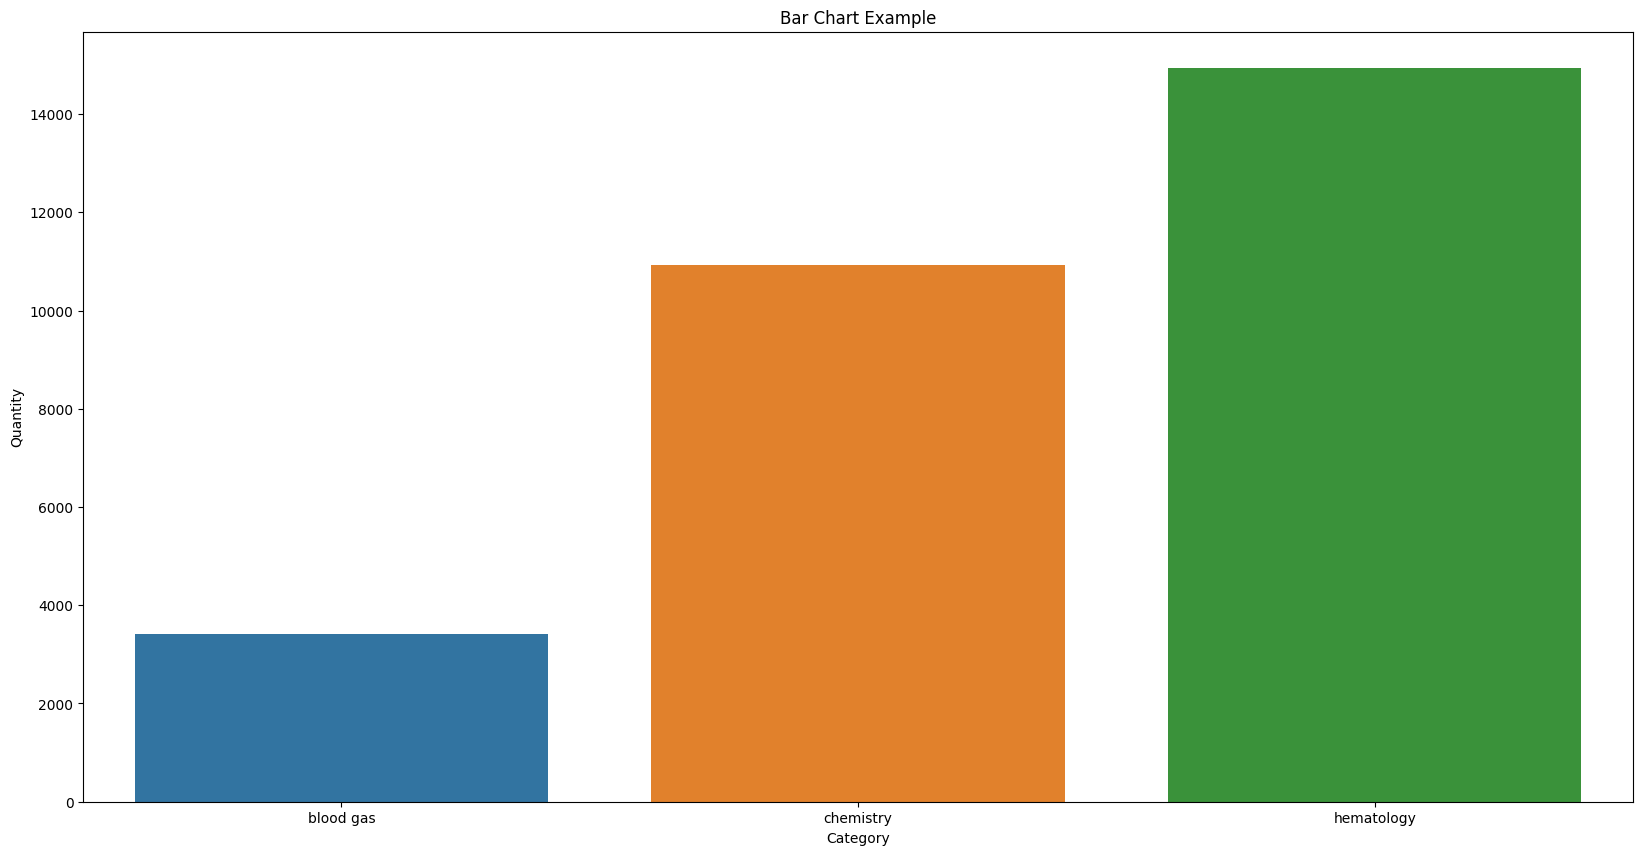

In [346]:
plt.figure(figsize=(20, 10))

sns.countplot(x='category', data=abnormal_df)

# Add labels and a title
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

Filter Blood Gas

In [347]:
bloodgas_df = df_lab[df_lab['category']=='blood gas']

In [348]:
abnormal_bloodgas_df = bloodgas_df[bloodgas_df['flag']=='abnormal']

In [349]:
bloodgas_df.tail(20)

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
11928,50828,Ventilator,blood,blood gas,NaN,43798,130870.0,2198-06-29 08:24:00,CONTROLLED,NaN,NaN,normal
11929,50828,Ventilator,blood,blood gas,NaN,43798,130870.0,2198-07-17 08:37:00,CONTROLLED,NaN,NaN,normal
11930,50828,Ventilator,blood,blood gas,NaN,43798,130870.0,2198-07-19 18:34:00,SPONTANEOUS,NaN,NaN,normal
11931,50828,Ventilator,blood,blood gas,NaN,44083,125157.0,2112-05-04 11:33:00,CONTROLLED,NaN,NaN,normal
11932,50828,Ventilator,blood,blood gas,NaN,44083,125157.0,2112-05-04 15:24:00,CONTROLLED,NaN,NaN,normal
11933,50828,Ventilator,blood,blood gas,NaN,44083,125157.0,2112-05-04 15:41:00,CONTROLLED,NaN,NaN,normal
11934,50828,Ventilator,blood,blood gas,NaN,44083,125157.0,2112-05-04 17:07:00,CONTROLLED,NaN,NaN,normal
11935,50828,Ventilator,blood,blood gas,NaN,44212,163189.0,2123-11-25 07:32:00,SPONTANEOUS,NaN,NaN,normal
11936,50828,Ventilator,blood,blood gas,NaN,44212,163189.0,2123-11-27 04:29:00,CONTROLLED,NaN,NaN,normal
11937,50828,Ventilator,blood,blood gas,NaN,44212,163189.0,2123-11-27 05:56:00,CONTROLLED,NaN,NaN,normal


In [350]:
bloodgas_df['loinc_code'].isnull().sum()

2620

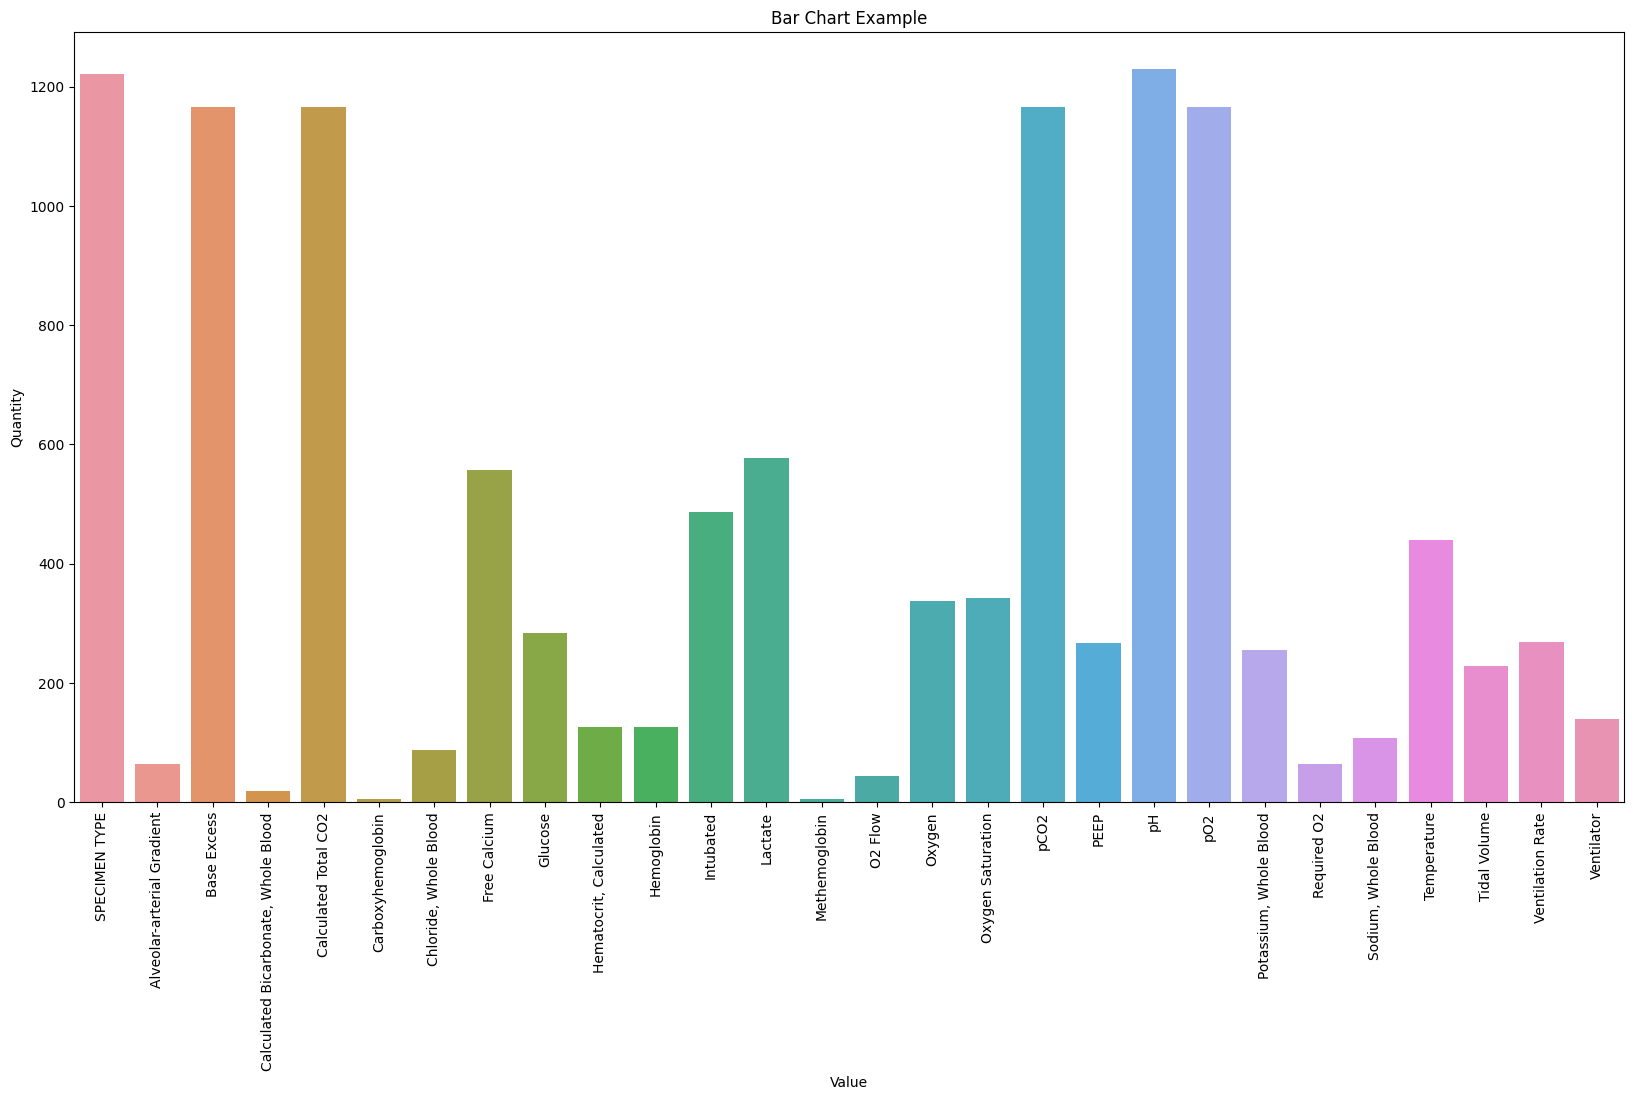

In [351]:
plt.figure(figsize=(20, 10))

ax=sns.countplot(x='label', data=bloodgas_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

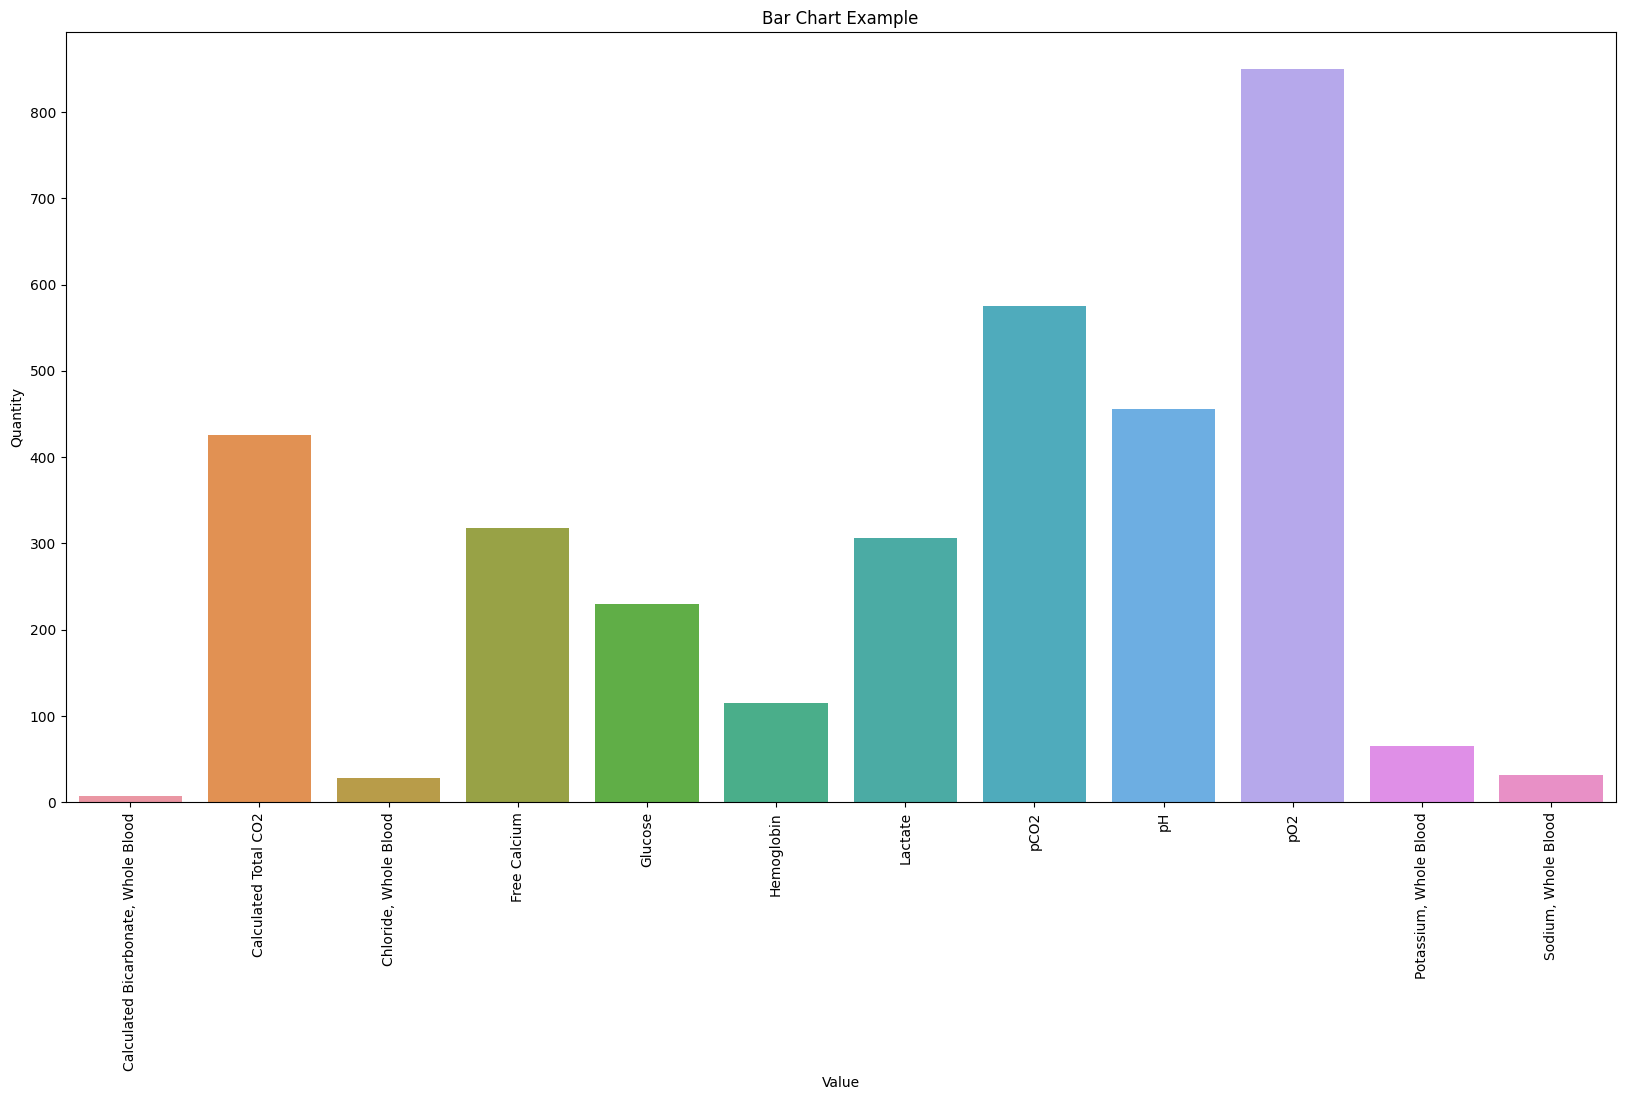

In [352]:
plt.figure(figsize=(20, 10))

ax=sns.countplot(x='label', data=abnormal_bloodgas_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

Column to be Kept for Lab Testing

In [353]:
selected_columns_lab = df_lab[['fluid', 'category', 'subject_id', 'charttime','flag']]

In [354]:
selected_columns_lab.tail()

,fluid,category,subject_id,charttime,flag
76068,urine,chemistry,44154,2178-05-14 16:45:00,normal
76069,urine,chemistry,44228,2170-12-15 03:20:00,normal
76070,blood,chemistry,43927,2176-04-08 09:50:00,normal
76071,blood,chemistry,44222,2181-03-02 07:54:00,abnormal
76072,blood,hematology,42458,2147-03-22 14:20:00,normal


In [355]:
selected_columns_lab.shape

(75526, 5)

In [356]:
selected_columns_lab.duplicated().sum()

62244

In [357]:
selected_columns_lab = selected_columns_lab[(selected_columns_lab['fluid'] == 'blood') | (selected_columns_lab['fluid'] == 'urine')]

In [358]:
selected_columns_lab.head()

,fluid,category,subject_id,charttime,flag
0,blood,blood gas,10006,2164-10-02 08:26:00,normal
1,blood,blood gas,10006,2164-11-16 03:05:00,normal
2,blood,blood gas,10006,2165-06-02 22:28:00,normal
3,blood,blood gas,10011,2126-08-15 04:25:00,normal
4,blood,blood gas,10011,2126-08-17 22:23:00,normal


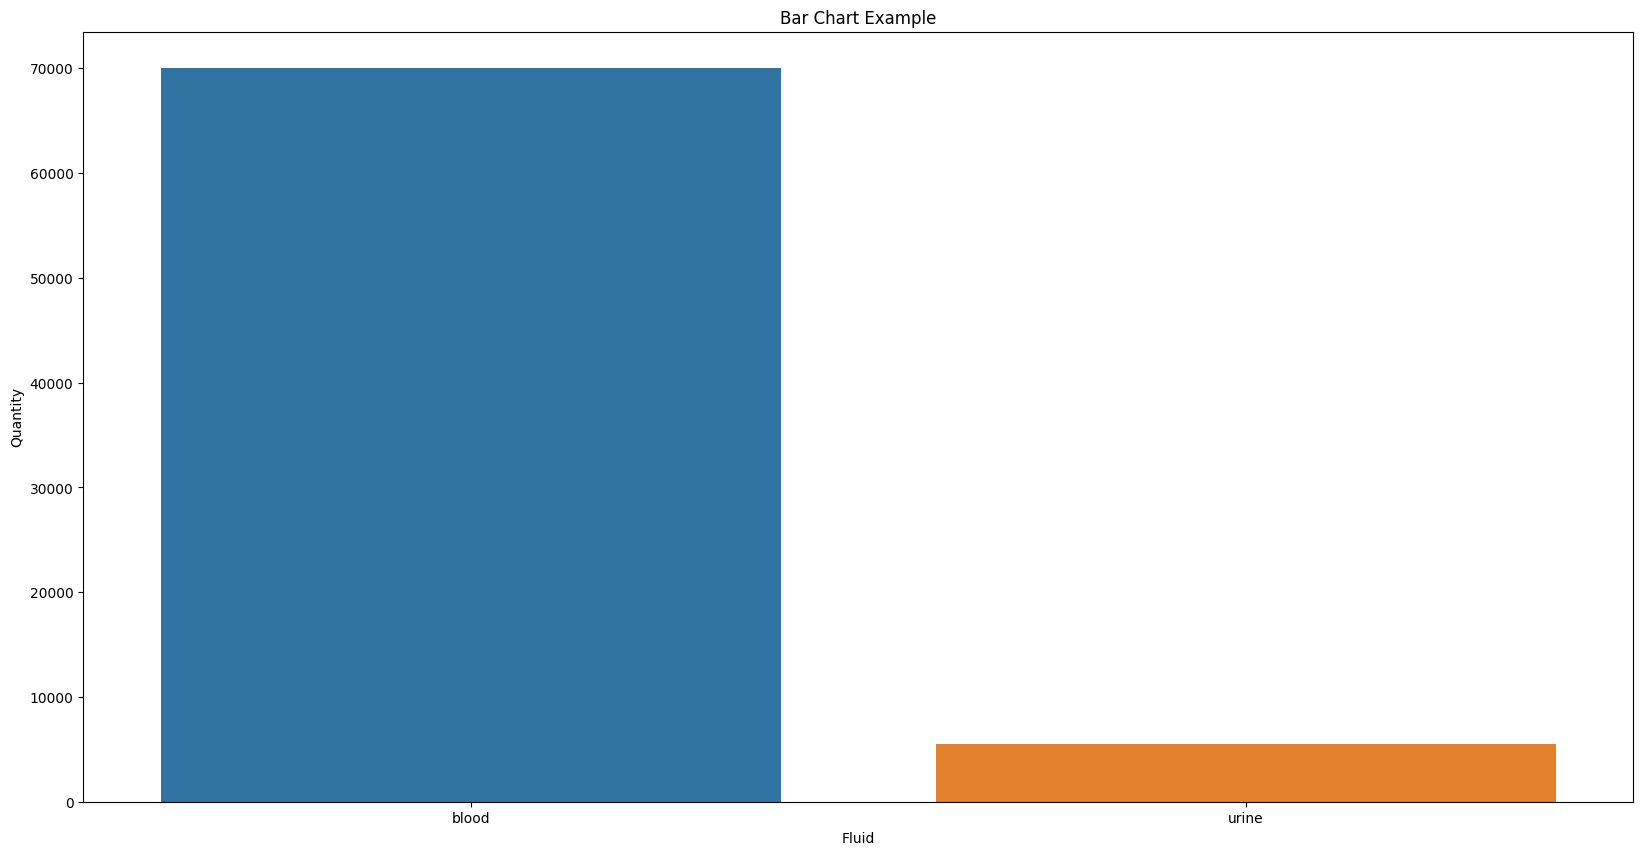

In [359]:
plt.figure(figsize=(20, 10))

sns.countplot(x='fluid', data=selected_columns_lab)

# Add labels and a title
plt.xlabel('Fluid')
plt.ylabel('Quantity')
plt.title('Bar Chart Example')


# Show the chart
plt.show()

In [360]:
# Sort the DataFrame by 'charttime' in descending order
df_sorted_lab = selected_columns_lab.sort_values(by='charttime', ascending=False)

# Drop duplicates based on 'fluid', 'category', and 'subject_id', keeping the first occurrence
df_filtered_lab = df_sorted_lab.drop_duplicates(subset=['fluid', 'category', 'subject_id'], keep='first')

# Reset the index if needed
df_filtered_lab.reset_index(drop=True, inplace=True)

In [361]:
df_filtered_lab.shape

(454, 5)

In [362]:
df_filtered_lab.head()

,fluid,category,subject_id,charttime,flag
0,blood,chemistry,41976,2202-10-11 04:45:00,abnormal
1,blood,hematology,41976,2202-10-11 04:45:00,abnormal
2,urine,hematology,41976,2202-10-08 08:00:00,abnormal
3,blood,blood gas,41976,2202-10-03 00:53:00,normal
4,urine,chemistry,41976,2201-11-17 04:48:00,normal


In [363]:
# Create a new column for the 'fluid_category' combination
df_filtered_lab['fluid_category'] = df_filtered_lab['fluid'] + '_' + df_filtered_lab['category']

# Pivot the DataFrame to create separate columns for each 'fluid_category' combination
final_df_lab = df_filtered_lab.pivot_table(index='subject_id', columns='fluid_category', values='flag', aggfunc='max', fill_value=0)

# Reset the index
final_df_lab.reset_index(inplace=True)

<ipython-input-363-768bb85d529e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_lab['fluid_category'] = df_filtered_lab['fluid'] + '_' + df_filtered_lab['category']


In [364]:
final_df_lab.head()

fluid_category,subject_id,blood_blood gas,blood_chemistry,blood_hematology,urine_chemistry,urine_hematology
0,10006,abnormal,abnormal,abnormal,normal,normal
1,10011,normal,normal,normal,normal,normal
2,10013,normal,abnormal,abnormal,normal,normal
3,10017,normal,normal,normal,normal,normal
4,10019,abnormal,abnormal,abnormal,normal,normal


In [365]:
final_df_lab['subject_id'].duplicated().sum()

0

In [366]:
num_rows = final_df_lab.shape[0]
print(f"The DataFrame has {num_rows} rows.")


The DataFrame has 100 rows.


### DIAGNOSIS TABLE

In [367]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [368]:
# Load relevant tables
df_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv')
df_d_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv')

In [369]:
df_diagnoses_icd.shape

(1761, 5)

In [370]:
df_diagnoses_icd.dtypes

row_id         int64
subject_id     int64
hadm_id        int64
seq_num        int64
icd9_code     object
dtype: object

In [371]:
df_diagnoses_icd.isnull().sum()

row_id        0
subject_id    0
hadm_id       0
seq_num       0
icd9_code     0
dtype: int64

In [372]:
# Summary stats
df_diagnoses_icd.describe(include='all')

,row_id,subject_id,hadm_id,seq_num,icd9_code
count,1761.000000,1761.000000,1761.000000,1761.000000,1761
unique,NaN,NaN,NaN,NaN,581
top,NaN,NaN,NaN,NaN,4019
freq,NaN,NaN,NaN,NaN,53
mean,287797.360591,30392.649631,152515.138558,8.844974,NaN
std,132861.091209,15461.173204,27552.374513,6.315866,NaN
min,112344.000000,10006.000000,100375.000000,1.000000,NaN
25%,113177.000000,10094.000000,128293.000000,4.000000,NaN
50%,382072.000000,40687.000000,155297.000000,8.000000,NaN
75%,389325.000000,42199.000000,174863.000000,12.000000,NaN


In [373]:
df_d_diagnoses_icd.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [374]:
df_d_diagnoses_icd.shape

(14567, 4)

In [375]:
# Check number of unique ICD-9 codes
unique_icd_codes_d = df_d_diagnoses_icd['icd9_code'].nunique()
print("Unique ICD-9 Codes:", unique_icd_codes_d)

Unique ICD-9 Codes: 14567


In [376]:
df_d_diagnoses_icd['icd9_code'].duplicated().sum()

0

In [377]:
df_d_diagnoses_icd = df_d_diagnoses_icd.drop_duplicates(subset=['icd9_code'])

In [378]:
df_d_diagnoses_icd['short_title'].duplicated().sum()

239

In [379]:
# Find the duplicated values in the 'short_title' column
duplicated_short_titles = df_d_diagnoses_icd[df_d_diagnoses_icd['short_title'].duplicated(keep=False)]

# Create a set to store the duplicated short titles
duplicated_short_titles_set = set(duplicated_short_titles['short_title'].unique())

# Create a dictionary to store ICD-9 codes for each duplicated title
icd9_codes_dict = {}

# Iterate through duplicated short titles and extract their ICD-9 codes
for short_title in duplicated_short_titles_set:
    icd9_codes = df_d_diagnoses_icd[df_d_diagnoses_icd['short_title'] == short_title]['icd9_code'].unique()
    icd9_codes_dict[short_title] = icd9_codes

# Print the ICD-9 Codes for Duplicated Short Titles
for short_title, icd9_codes in icd9_codes_dict.items():
    print(f"ICD-9 Codes for '{short_title}':")
    print(icd9_codes)
    print()

ICD-9 Codes for 'Cl skull fx NEC-concuss':
['80309' '80319' '80329' '80339' '80349']

ICD-9 Codes for 'Child abuse NOS':
['99550' 'E9679']

ICD-9 Codes for 'Cl skl base fx-prol coma':
['80134' '80144' '80104' '80114' '80124']

ICD-9 Codes for 'Contraceptive mangmt NEC':
['V2509' 'V258']

ICD-9 Codes for 'Open wnd mouth NOS-compl':
['87370' '87379']

ICD-9 Codes for 'Cl skul w oth fx-concuss':
['80419' '80429' '80439' '80449' '80409']

ICD-9 Codes for 'Opn skul vlt fx-brf coma':
['80052' '80062' '80072' '80082' '80092']

ICD-9 Codes for 'Opn skul fx NEC-brf coma':
['80352' '80362' '80372' '80382' '80392']

ICD-9 Codes for 'Cl skull vlt fx-mod coma':
['80003' '80013' '80023' '80033' '80043']

ICD-9 Codes for 'Facial weakness':
['43883' '78194']

ICD-9 Codes for 'Opn skl base fx-coma NOS':
['80156' '80166' '80176' '80186' '80196']

ICD-9 Codes for 'Extradural hem-mod coma':
['85253' '85243']

ICD-9 Codes for 'Cl skull vlt fx-coma NOS':
['80006' '80016' '80026' '80036' '80046']

ICD-9 Code

In [380]:
df_d_diagnoses_icd['long_title'].duplicated().sum()

5

In [381]:
# Find the duplicated values in the 'long_title' column
duplicated_long_titles = df_d_diagnoses_icd[df_d_diagnoses_icd['long_title'].duplicated(keep=False)]

# Create a set to store the duplicated long titles
duplicated_long_titles_set = set(duplicated_long_titles['long_title'].unique())

# Create a dictionary to store ICD-9 codes for each duplicated long title
icd9_codes_dict = {}

# Iterate through duplicated long titles and extract their ICD-9 codes
for long_title in duplicated_long_titles_set:
    icd9_codes = df_d_diagnoses_icd[df_d_diagnoses_icd['long_title'] == long_title]['icd9_code'].unique()
    icd9_codes_dict[long_title] = icd9_codes

# Print the ICD-9 Codes for Duplicated Long Titles
for long_title, icd9_codes in icd9_codes_dict.items():
    print(f"ICD-9 Codes for '{long_title}':")
    print(icd9_codes)
    print()

ICD-9 Codes for 'Suicide and self-inflicted injury by unspecified means':
['E9539' 'E9589']

ICD-9 Codes for 'Suicide and self-inflicted injury by other specified means':
['E9538' 'E9588']

ICD-9 Codes for 'Other multiple birth (three or more), mates liveborn and stillborn, born in hospital, delivered without mention of cesarean section':
['V3600' 'V3601']

ICD-9 Codes for 'Counseling for perpetrator of spousal and partner abuse':
['V6122' 'V6112']

ICD-9 Codes for 'Longitudinal deficiency, phalanges, complete or partial':
['75529' '75539']



In [382]:
## To check
icd9_code_to_find = 'V6112'

# Filter the DataFrame for the specified ICD-9 code
icd9_info = df_d_diagnoses_icd[df_d_diagnoses_icd['icd9_code'] == icd9_code_to_find]

if not icd9_info.empty:
    short_title = icd9_info['short_title'].values[0]
    long_title = icd9_info['long_title'].values[0]
    print("ICD-9 Code:", icd9_code_to_find)
    print("Short Title:", short_title)
    print("Long Title:", long_title)
else:
    print("ICD-9 Code not found:", icd9_code_to_find)

ICD-9 Code: V6112
Short Title: Cnsl perp partner abuse
Long Title: Counseling for perpetrator of spousal and partner abuse


#### Data Preprocessing

In [383]:
df_diagnoses_icd = df_diagnoses_icd.drop('row_id', axis=1)
df_d_diagnoses_icd = df_d_diagnoses_icd.drop('row_id', axis=1)

In [384]:
df_diagnoses = df_diagnoses_icd.merge(df_d_diagnoses_icd, on='icd9_code', how='left')

In [385]:
# Calculate unique patients and admissions
unique_patients = df_diagnoses['subject_id'].nunique()
unique_admissions = df_diagnoses['hadm_id'].nunique()

print("Unique Patients:", unique_patients)
print("Unique Admissions:", unique_admissions)

Unique Patients: 100
Unique Admissions: 129


In [386]:
# Check number of unique ICD-9 codes
unique_icd_codes = df_diagnoses['icd9_code'].nunique()
print("Unique ICD-9 Codes:", unique_icd_codes)

Unique ICD-9 Codes: 581


In [387]:
df_diagnoses.head(10)

,subject_id,hadm_id,seq_num,icd9_code,short_title,long_title
0,10006,142345,1,99591,Sepsis,Sepsis
1,10006,142345,2,99662,React-oth vasc dev/graft,Infection and inflammatory reaction due to oth...
2,10006,142345,3,5672,NaN,NaN
3,10006,142345,4,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi..."
4,10006,142345,5,42731,Atrial fibrillation,Atrial fibrillation
5,10006,142345,6,4280,CHF NOS,"Congestive heart failure, unspecified"
6,10006,142345,7,4241,Aortic valve disorder,Aortic valve disorders
7,10006,142345,8,4240,Mitral valve disorder,Mitral valve disorders
8,10006,142345,9,2874,NaN,NaN
9,10006,142345,10,03819,Staphylcocc septicem NEC,Other staphylococcal septicemia


In [388]:
df_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 1760
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject_id   1761 non-null   int64 
 1   hadm_id      1761 non-null   int64 
 2   seq_num      1761 non-null   int64 
 3   icd9_code    1761 non-null   object
 4   short_title  1716 non-null   object
 5   long_title   1716 non-null   object
dtypes: int64(3), object(3)
memory usage: 96.3+ KB


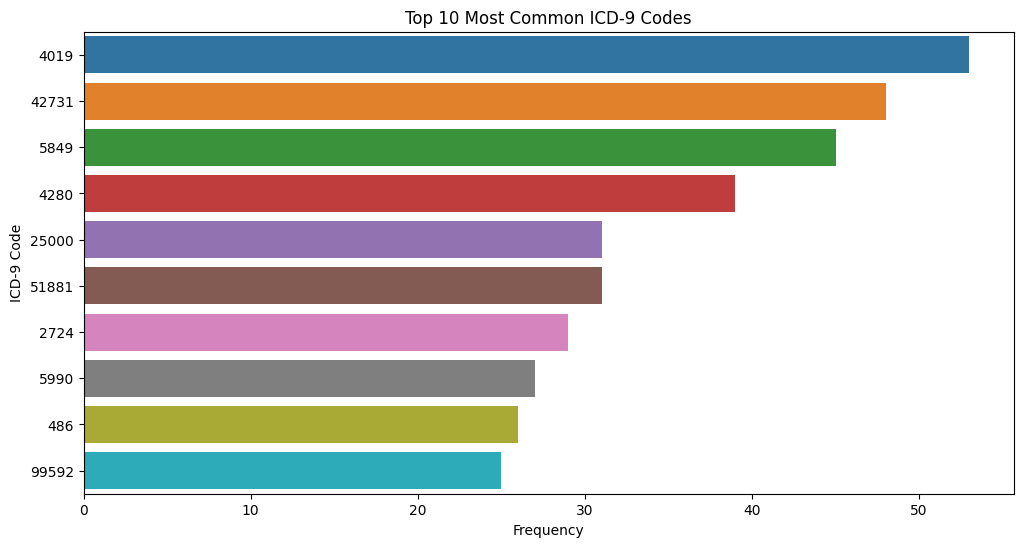

In [389]:
# Count and visualize the most common ICD-9 codes
top_icd_codes = df_diagnoses['icd9_code'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_icd_codes.values, y=top_icd_codes.index, orient='h')
plt.title('Top 10 Most Common ICD-9 Codes')
plt.xlabel('Frequency')
plt.ylabel('ICD-9 Code')
plt.show()

In [390]:
# Count the most common ICD-9 codes
top_icd_codes = df_diagnoses['icd9_code'].value_counts().head(10)

# Get the corresponding long titles for the top ICD-9 codes
top_icd_long_titles = df_diagnoses[df_diagnoses['icd9_code'].isin(top_icd_codes.index)]

# Display the top 10 ICD-9 codes and their long titles
for icd_code in top_icd_codes.index:
    icd_long_title = top_icd_long_titles[top_icd_long_titles['icd9_code'] == icd_code]['long_title'].values[0]
    print("ICD-9 Code:", icd_code)
    print("Long Title:", icd_long_title)
    print()

ICD-9 Code: 4019
Long Title: Unspecified essential hypertension

ICD-9 Code: 42731
Long Title: Atrial fibrillation

ICD-9 Code: 5849
Long Title: Acute kidney failure, unspecified

ICD-9 Code: 4280
Long Title: Congestive heart failure, unspecified

ICD-9 Code: 25000
Long Title: Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled

ICD-9 Code: 51881
Long Title: Acute respiratory failure

ICD-9 Code: 2724
Long Title: Other and unspecified hyperlipidemia

ICD-9 Code: 5990
Long Title: Urinary tract infection, site not specified

ICD-9 Code: 486
Long Title: Pneumonia, organism unspecified

ICD-9 Code: 99592
Long Title: Severe sepsis



In [391]:
df_diagnoses['short_title'].isna().sum()

45

In [392]:
df_diagnoses['long_title'].isna().sum()

45

In [393]:
# Find the ICD-9 codes with NaN values in both short_title and long_title
icd9_codes_with_nan_titles = df_diagnoses[
    df_diagnoses['short_title'].isna() &
    df_diagnoses['long_title'].isna()
]['icd9_code'].unique()

print("ICD-9 Codes with NaN Titles:")
print(icd9_codes_with_nan_titles)

ICD-9 Codes with NaN Titles:
['5672' '2874' '4582' '2848' '7299' '4538' '0414' '2765' '6000' '2554'
 '7895' '7872' '7806' '2766' '585' '5185' '9980' '3488' '2841' '9974']


In [394]:
# #Preprocessing by Transform It
# # Replace NaN values in 'short_title' and 'long_title' columns for a specific ICD-9 code
# specific_icd9_code = '5672'  # Replace with the actual ICD-9 code you're interested in

# # Update 'short_title' and 'long_title' columns for the specific ICD-9 code
# df_diagnoses.loc[df_diagnoses['icd9_code'] == specific_icd9_code, 'short_title'] = 'Peritonitis (acute), generalized'
# df_diagnoses.loc[df_diagnoses['icd9_code'] == specific_icd9_code, 'long_title'] = 'Peritonitis (acute), generalized'

# List of ICD-9 codes and their corresponding titles
icd9_codes_and_titles = {
    '5672': 'Peritonitis (acute), generalized',
    '2874': 'Secondary thrombocytosis',
    '4582': 'Hypotension, chronic',
    '2848': 'Myelodysplastic syndrome',
    '7299': 'Other disorders of soft tissues',
    '4538': 'Other venous embolism and thrombosis of other specified veins',
    '414': 'Other forms of chronic ischemic heart disease',
    '2765': 'Disorders of fluid, electrolyte, and acid-base balance',
    '6000': 'Hypertrophy (benign) of prostate without urinary obstruction and other lower urinary tract symptom (LUTS)',
    '2554': 'Hyperaldosteronism',
    '7895': 'Abdominal pain, other specified site',
    '7872': 'Dysphagia',
    '7806': 'Fever, unspecified',
    '2766': 'Fluid overload',
    '585': 'Chronic kidney disease, Stage I',
    '5185': 'Pulmonary insufficiency, unspecified',
    '9980': 'Postoperative shock',
    '3488': 'Other conditions of brain',
    '2841': 'Pancytopenia',
    '9974': 'Iatrogenic cerebrovascular infarction or hemorrhage'
}

# Update titles for each ICD-9 code
for icd9_code, title in icd9_codes_and_titles.items():
    df_diagnoses.loc[df_diagnoses['icd9_code'] == icd9_code, 'short_title'] = title
    df_diagnoses.loc[df_diagnoses['icd9_code'] == icd9_code, 'long_title'] = title

In [395]:
df_diagnoses['short_title'].isna().sum()

8

In [396]:
df_diagnoses['long_title'].isna().sum()

8

#### Columns to Be Kept

In [397]:
selected_columns_diagnoses = df_diagnoses[['subject_id', 'hadm_id', 'seq_num', 'icd9_code']]

In [398]:
selected_columns_diagnoses.head(50)

,subject_id,hadm_id,seq_num,icd9_code
0,10006,142345,1,99591
1,10006,142345,2,99662
2,10006,142345,3,5672
3,10006,142345,4,40391
4,10006,142345,5,42731
5,10006,142345,6,4280
6,10006,142345,7,4241
7,10006,142345,8,4240
8,10006,142345,9,2874
9,10006,142345,10,03819


In [399]:
from sklearn.preprocessing import MultiLabelBinarizer

# Filter the DataFrame to unique subject IDs
unique_subject_ids = df_diagnoses['subject_id'].unique()

# Create a DataFrame with unique subject IDs and their corresponding ICD-9 codes
subject_icd_df = df_diagnoses[df_diagnoses['subject_id'].isin(unique_subject_ids)][['subject_id', 'icd9_code']]

# Group ICD-9 codes by subject ID
grouped_icd_codes = subject_icd_df.groupby('subject_id')['icd9_code'].apply(list).reset_index()

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the grouped ICD-9 codes into a binary matrix
icd_binarized = mlb.fit_transform(grouped_icd_codes['icd9_code'])

# Create a new DataFrame with the binary matrix and subject IDs as index
icd_binarized_df = pd.DataFrame(icd_binarized, columns=mlb.classes_, index=grouped_icd_codes['subject_id'])

# Display the resulting DataFrame
icd_binarized_df

,00845,0380,03811,03812,03819,0383,03840,03842,03843,03849,...,V5419,V550,V551,V5861,V5865,V5867,V600,V667,V8741,V8801
subject_id,,,,,,,,,,,,,,,,,,,,,
10006,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44212,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [400]:
# Define the path where you want to save the Excel file
excel_file_path = 'icd_binarized_data.xlsx'

# Save the DataFrame to an Excel file
icd_binarized_df.to_excel(excel_file_path, index=True)

print(f"DataFrame saved to {excel_file_path}")

DataFrame saved to icd_binarized_data.xlsx


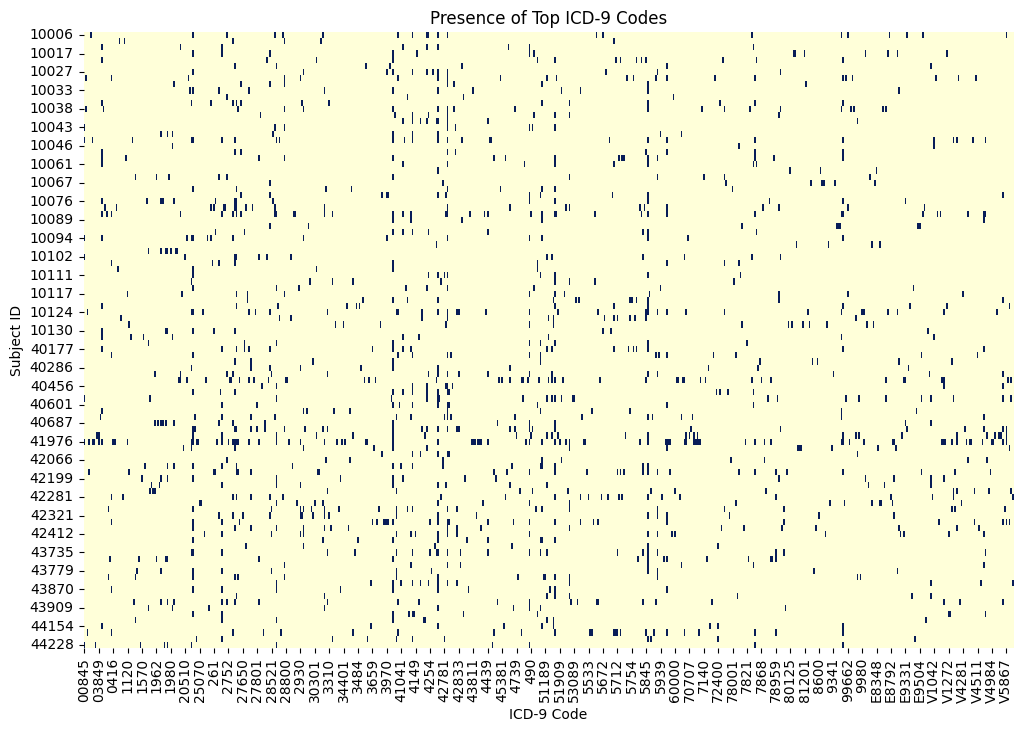

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of ICD-9 codes for visualization (e.g., top 200)
subset_icd_codes = icd_binarized_df.columns[:585]

# Subset the DataFrame
subset_df = icd_binarized_df[subset_icd_codes]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subset_df, cmap='YlGnBu', cbar=False)
plt.title('Presence of Top ICD-9 Codes')
plt.xlabel('ICD-9 Code')
plt.ylabel('Subject ID')
plt.show()

### Merge Dataframe and Additional Preprocessing

Since the columns in icd_binarized_df is too many the Feature Importance (with random forest) and Feature Selection based on Variance is done to reduce the number of columns

In [402]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

# Step 1: Merge icd_binarized_df with admissions_df to get the target variable
merged_df = pd.merge(icd_binarized_df, admissions_df[['subject_id', 're_admission']], on='subject_id', how='inner')

X = merged_df.drop(columns=['subject_id', 're_admission'])
y = merged_df['re_admission']

# Step 2.1: Train a Random Forest to get feature importances
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
feature_importances = clf.feature_importances_

# Step 2.2: Select top N features based on importance
N = 100  # Adjust this number based on your needs
top_features = [X.columns[i] for i in feature_importances.argsort()[-N:]]

reduced_df = merged_df[['subject_id'] + top_features]

# Step 3: Feature Selection based on Variance
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
reduced_data = selector.fit_transform(reduced_df.drop(columns=['subject_id']))

# Get the columns that were kept after variance thresholding
kept_columns = reduced_df.columns[selector.get_support(indices=True) + 1]  # +1 to account for 'subject_id' column

# Convert numpy array back to DataFrame and add 'subject_id' column
reduced_df_transformed = pd.DataFrame(reduced_data, columns=kept_columns)
reduced_df_transformed['subject_id'] = reduced_df['subject_id'].values

# Step 4: Combine the DataFrames
combined_df = pd.merge(reduced_df_transformed, final_df_lab, on='subject_id', how='inner')
combined_df = pd.merge(combined_df, aggregated_cptevents, on='subject_id', how='inner')


In [403]:
combined_df.head(50)

,53390,27801,2841,4240,0414,40391,V1272,5859,36250,2724,...,subject_id,blood_blood gas,blood_chemistry,blood_hematology,urine_chemistry,urine_hematology,hadm_id,costcenter_ICU,costcenter_Resp,section_subsection
0,0,0,0,1,0,1,0,0,0,0,...,10006,abnormal,abnormal,abnormal,normal,normal,142345.000000,1.000000,0.000000,{'Evaluation and management': ['Critical care ...
1,0,0,0,1,0,0,0,0,0,1,...,10013,normal,abnormal,abnormal,normal,normal,165520.000000,0.000000,1.000000,{'Medicine': ['Pulmonary']}
2,0,0,0,0,0,0,0,0,0,1,...,10017,normal,normal,normal,normal,normal,199207.000000,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...
3,0,0,0,0,0,0,0,0,0,0,...,10019,abnormal,abnormal,abnormal,normal,normal,177759.000000,0.800000,0.200000,{'Evaluation and management': ['Hospital inpat...
4,0,0,0,0,0,0,0,0,0,0,...,10026,0,abnormal,abnormal,normal,normal,103770.000000,1.000000,0.000000,{'Evaluation and management': ['Critical care ...
5,0,0,0,1,0,0,0,1,0,0,...,10027,normal,normal,abnormal,0,normal,199395.000000,0.333333,0.666667,{'Evaluation and management': ['Hospital inpat...
6,0,0,0,0,1,1,0,0,0,0,...,10029,abnormal,normal,normal,normal,normal,132349.000000,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...
7,0,0,0,0,0,0,0,0,0,0,...,10032,normal,normal,normal,normal,abnormal,140372.000000,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...
8,1,0,0,0,0,0,0,0,0,0,...,10033,abnormal,normal,normal,normal,normal,157235.000000,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...
9,0,0,0,0,0,0,0,0,0,0,...,10036,normal,normal,normal,normal,normal,189483.000000,0.750000,0.250000,{'Evaluation and management': ['Critical care ...


In [404]:
# Adjust Dataframe
cols = ['subject_id'] + [col for col in combined_df if col != 'subject_id']
combined_df = combined_df[cols]


In [405]:
combined_df.head()

,subject_id,53390,27801,2841,4240,0414,40391,V1272,5859,36250,...,49390,blood_blood gas,blood_chemistry,blood_hematology,urine_chemistry,urine_hematology,hadm_id,costcenter_ICU,costcenter_Resp,section_subsection
0,10006,0,0,0,1,0,1,0,0,0,...,0,abnormal,abnormal,abnormal,normal,normal,142345.0,1.0,0.0,{'Evaluation and management': ['Critical care ...
1,10013,0,0,0,1,0,0,0,0,0,...,0,normal,abnormal,abnormal,normal,normal,165520.0,0.0,1.0,{'Medicine': ['Pulmonary']}
2,10017,0,0,0,0,0,0,0,0,0,...,0,normal,normal,normal,normal,normal,199207.0,1.0,0.0,{'Evaluation and management': ['Hospital inpat...
3,10019,0,0,0,0,0,0,0,0,0,...,1,abnormal,abnormal,abnormal,normal,normal,177759.0,0.8,0.2,{'Evaluation and management': ['Hospital inpat...
4,10026,0,0,0,0,0,0,0,0,0,...,0,0,abnormal,abnormal,normal,normal,103770.0,1.0,0.0,{'Evaluation and management': ['Critical care ...


In [406]:
combined_df = pd.merge(combined_df, admissions_df, on='subject_id', how='inner')

In [407]:
print(combined_df.columns)

Index(['subject_id', '53390', '27801', '2841', '4240', '0414', '40391',
       'V1272', '5859', '36250', '2724', 'V4582', '4160', '4589', '5789',
       '5185', '1122', '41071', '2800', '570', '4439', '3051', '5990', 'V103',
       '42789', '3970', '2859', '42843', '3569', '2720', '4538', 'E9308',
       '2760', '5853', '53081', '99591', '311', '2761', '40390', '1510',
       '4588', '99592', '7907', 'V1042', '45829', '2948', '5070', '78559',
       '2851', '496', '42781', '78551', '4280', '1628', '78552', '1970',
       '27652', 'V5861', '99662', '42731', '1983', '5849', '5119', '486',
       '1977', '4241', '49121', '30390', '431', '2449', '725', '27651', '2762',
       '0389', '25000', '41400', '28529', '4928', 'V4581', '4019', '78039',
       '51881', '72400', '49390', 'blood_blood gas', 'blood_chemistry',
       'blood_hematology', 'urine_chemistry', 'urine_hematology', 'hadm_id_x',
       'costcenter_ICU', 'costcenter_Resp', 'section_subsection', 'hadm_id_y',
       'diagnosis', 

In [408]:
combined_df.tail()

,subject_id,53390,27801,2841,4240,0414,40391,V1272,5859,36250,...,costcenter_ICU,costcenter_Resp,section_subsection,hadm_id_y,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT
86,44083,0,0,0,0,0,0,0,0,0,...,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...,198330,PERICARDIAL EFFUSION,0.096462,1,0,1,0
87,44154,0,0,0,0,0,0,0,0,1,...,0.750000,0.250000,{'Evaluation and management': ['Critical care ...,174245,ALTERED MENTAL STATUS,-0.691105,0,0,1,0
88,44212,0,0,0,0,1,1,0,0,0,...,0.886364,0.113636,"{'Surgery': ['Cardiovascular system', 'Cardiov...",163189,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,2.144134,1,0,1,0
89,44222,0,0,0,0,0,0,0,0,0,...,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...,192189,BRADYCARDIA,-0.612348,0,0,1,0
90,44228,0,0,0,0,0,0,0,0,0,...,1.000000,0.000000,{'Evaluation and management': ['Hospital inpat...,103379,CHOLANGITIS,0.017705,1,0,1,0


In [409]:
combined_df['subject_id'].duplicated().sum()

0

In [410]:
duplicates = combined_df[combined_df.duplicated(subset='subject_id', keep=False)]
print(duplicates.sort_values(by='subject_id'))

Empty DataFrame
Columns: [subject_id, 53390, 27801, 2841, 4240, 0414, 40391, V1272, 5859, 36250, 2724, V4582, 4160, 4589, 5789, 5185, 1122, 41071, 2800, 570, 4439, 3051, 5990, V103, 42789, 3970, 2859, 42843, 3569, 2720, 4538, E9308, 2760, 5853, 53081, 99591, 311, 2761, 40390, 1510, 4588, 99592, 7907, V1042, 45829, 2948, 5070, 78559, 2851, 496, 42781, 78551, 4280, 1628, 78552, 1970, 27652, V5861, 99662, 42731, 1983, 5849, 5119, 486, 1977, 4241, 49121, 30390, 431, 2449, 725, 27651, 2762, 0389, 25000, 41400, 28529, 4928, V4581, 4019, 78039, 51881, 72400, 49390, blood_blood gas, blood_chemistry, blood_hematology, urine_chemistry, urine_hematology, hadm_id_x, costcenter_ICU, costcenter_Resp, section_subsection, hadm_id_y, diagnosis, LOS, re_admission, admission_type_ELECTIVE, admission_type_EMERGENCY, admission_type_URGENT]
Index: []

[0 rows x 100 columns]


In [411]:
# Determine aggregation functions for each column
aggregation_functions = {}

for column in combined_df.columns:
    # Exclude 'subject_id' from aggregation
    if column != 'subject_id':
        # If column data type is numeric, use 'mean'
        if np.issubdtype(combined_df[column].dtype, np.number):
            aggregation_functions[column] = 'mean'
        # Otherwise, use mode for categorical columns
        else:
            aggregation_functions[column] = lambda x: x.mode()[0] if not x.mode().empty else np.nan

# Aggregate the data
aggregated_df = combined_df.groupby('subject_id').agg(aggregation_functions).reset_index()


In [412]:
aggregated_df.head()

,subject_id,53390,27801,2841,4240,0414,40391,V1272,5859,36250,...,costcenter_ICU,costcenter_Resp,section_subsection,hadm_id_y,diagnosis,LOS,re_admission,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT
0,10006,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,{'Evaluation and management': ['Critical care ...,142345.0,SEPSIS,-0.061052,0.0,0.0,1.0,0.0
1,10013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,{'Medicine': ['Pulmonary']},165520.0,SEPSIS,-0.533591,1.0,0.0,1.0,0.0
2,10017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,{'Evaluation and management': ['Hospital inpat...,199207.0,HUMERAL FRACTURE,-0.061052,0.0,0.0,1.0,0.0
3,10019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,{'Evaluation and management': ['Hospital inpat...,177759.0,ALCOHOLIC HEPATITIS,-0.691105,0.0,0.0,1.0,0.0
4,10026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,{'Evaluation and management': ['Critical care ...,103770.0,STROKE/TIA,-0.139808,0.0,0.0,1.0,0.0


In [413]:
aggregated_df['subject_id'].duplicated().sum()

0

In [414]:
# Save the combined_df to a CSV file
aggregated_df.to_csv('agrregated_dataframe.csv', index=False)
print("combined_df saved as 'aggregated_dataframe.csv'")


combined_df saved as 'aggregated_dataframe.csv'


In [415]:
num_rows = aggregated_df.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 91 rows.


In [416]:
#Drop subject_id for training purpose
train_df = aggregated_df.drop(columns=['subject_id'])

In [417]:
dict_columns = [col for col in train_df.columns if train_df[col].apply(type).eq(dict).any()]
print("Columns containing dictionary values:", dict_columns)

Columns containing dictionary values: ['section_subsection']


In [418]:
train_df['section_subsection'] = train_df['section_subsection'].astype(str)


In [419]:
# Identify non-numeric columns
non_numeric_columns = train_df.select_dtypes(exclude=['int64', 'float64']).columns

# Drop the target variable from the list if it's present
if 're_admission' in non_numeric_columns:
    non_numeric_columns = non_numeric_columns.drop('re_admission')

# One-hot encode these columns
train_df_encoded = pd.get_dummies(train_df, columns=non_numeric_columns)

# Now, you can apply the RandomForest code on this encoded dataframe
X = train_df_encoded.drop('re_admission', axis=1)
y = train_df_encoded['re_admission']

clf = RandomForestClassifier()
clf.fit(X, y)
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
threshold = 0.01  # You can adjust this threshold as needed
to_drop = feature_importances[feature_importances['importance'] < threshold].index
train_df_encoded.drop(columns=to_drop, inplace=True)


In [420]:
train_df_encoded

,V5861,486,49121,27651,41400,28529,V4581,4019,51881,72400,...,hadm_id_x,costcenter_ICU,costcenter_Resp,hadm_id_y,LOS,re_admission,blood_blood gas_normal,blood_hematology_abnormal,blood_hematology_normal,urine_chemistry_0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,142345.000000,1.000000,0.000000,142345.0,-0.061052,0.0,0,1,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,165520.000000,0.000000,1.000000,165520.0,-0.533591,1.0,1,1,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,199207.000000,1.000000,0.000000,199207.0,-0.061052,0.0,1,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,177759.000000,0.800000,0.200000,177759.0,-0.691105,0.0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103770.000000,1.000000,0.000000,103770.0,-0.139808,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,154659.923077,1.000000,0.000000,198330.0,0.096462,1.0,0,0,1,1
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,174245.000000,0.750000,0.250000,174245.0,-0.691105,0.0,1,1,0,0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,163189.000000,0.886364,0.113636,163189.0,2.144134,1.0,1,1,0,0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,192189.000000,1.000000,0.000000,192189.0,-0.612348,0.0,0,1,0,0


In [421]:
#Drop Irrelevant Column
train_df_encoded = train_df_encoded.drop(columns=['hadm_id_y', 'hadm_id_x'])

In [422]:
# Save the combined_df to a CSV file
train_df_encoded.to_csv('train.csv', index=False)
print("train_df_encoded saved as 'train.csv'")

train_df_encoded saved as 'train.csv'


## Model Training

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Identify columns with dictionary values
dict_columns = [col for col in train_df_encoded.columns if train_df_encoded[col].apply(type).eq(dict).any()]

# Flatten the dictionary (assuming there's only one such column for simplicity)
if dict_columns:
    dict_col = dict_columns[0]
    dict_df = train_df_encoded[dict_col].apply(pd.Series)
    train_df_encoded = pd.concat([train_df_encoded.drop(dict_col, axis=1), dict_df], axis=1)

# Identify columns with list values
list_columns = [col for col in train_df_encoded.columns if train_df_encoded[col].apply(type).eq(list).any()]

# Convert lists to strings
for list_col in list_columns:
    train_df_encoded[list_col] = train_df_encoded[list_col].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Apply one-hot encoding
X_encoded = pd.get_dummies(train_df_encoded.drop('re_admission', axis=1), drop_first=True)

# Splitting the encoded data
y = train_df_encoded['re_admission']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


#### Logistic Regression

In [424]:
# Train the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state = 42)
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        10
         1.0       0.60      1.00      0.75         9

    accuracy                           0.68        19
   macro avg       0.80      0.70      0.66        19
weighted avg       0.81      0.68      0.66        19



#### Random Forest

In [425]:
from sklearn.ensemble import RandomForestClassifier

# Training the model
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        10
         1.0       0.60      1.00      0.75         9

    accuracy                           0.68        19
   macro avg       0.80      0.70      0.66        19
weighted avg       0.81      0.68      0.66        19



#### XGBoost

In [426]:
import xgboost as xgb

# Training the model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'seed' : 42
}

num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Predictions and evaluation
y_pred_prob_xgb = bst.predict(dtest)
y_pred_xgb = [1 if prob > 0.5 else 0 for prob in y_pred_prob_xgb]
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

         0.0       0.60      0.30      0.40        10
         1.0       0.50      0.78      0.61         9

    accuracy                           0.53        19
   macro avg       0.55      0.54      0.50        19
weighted avg       0.55      0.53      0.50        19



#### Neural Network

In [427]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Building the model
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
2/2 [==============================] - 2s 794ms/step - loss: 0.7190 - accuracy: 0.4386 - val_loss: 0.6956 - val_accuracy: 0.5333
Epoch 2/100
2/2 [==============================] - 0s 142ms/step - loss: 0.7245 - accuracy: 0.5088 - val_loss: 0.6853 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 157ms/step - loss: 0.6457 - accuracy: 0.6667 - val_loss: 0.6764 - val_accuracy: 0.6000
Epoch 4/100
2/2 [==============================] - 0s 166ms/step - loss: 0.7270 - accuracy: 0.4737 - val_loss: 0.6684 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 117ms/step - loss: 0.6642 - accuracy: 0.6316 - val_loss: 0.6616 - val_accuracy: 0.7333
Epoch 6/100
2/2 [==============================] - 0s 168ms/step - loss: 0.6496 - accuracy: 0.5789 - val_loss: 0.6562 - val_accuracy: 0.7333
Epoch 7/100
2/2 [==============================] - 0s 97ms/step - loss: 0.6649 - accuracy: 0.5789 - val_loss: 0.6504 - val_accuracy: 0.7333
Epoch 8/100
2/

In [428]:
# Predictions and evaluation
y_pred_prob_nn = nn_model.predict(X_test)
y_pred_nn = [1 if prob > 0.5 else 0 for prob in y_pred_prob_nn]
print("Neural Network Results:")
print(classification_report(y_test, y_pred_nn))

1/1 [==============================] - 0s 104ms/step
Neural Network Results:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67        10
         1.0       0.64      1.00      0.78         9

    accuracy                           0.74        19
   macro avg       0.82      0.75      0.72        19
weighted avg       0.83      0.74      0.72        19



In [429]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Training the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)

# Performance metrics
print(classification_report(y_test, y_pred_gbm))


              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.60      0.67      0.63         9

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19



## Models Performance Comparison

In [430]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network', 'GBM']
predictions = [y_pred_lr, y_pred_rf, y_pred_xgb, y_pred_nn, y_pred_gbm]

print("Model Performance Metrics Comparison:\n")
for model, pred in zip(models, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f"Precision: {precision_score(y_test, pred):.4f}")
    print(f"Recall: {recall_score(y_test, pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, pred):.4f}\n")


Model Performance Metrics Comparison:

Model: Logistic Regression
Accuracy: 0.6842
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500

Model: Random Forest
Accuracy: 0.6842
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500

Model: XGBoost
Accuracy: 0.5263
Precision: 0.5000
Recall: 0.7778
F1-Score: 0.6087

Model: Neural Network
Accuracy: 0.7368
Precision: 0.6429
Recall: 1.0000
F1-Score: 0.7826

Model: GBM
Accuracy: 0.6316
Precision: 0.6000
Recall: 0.6667
F1-Score: 0.6316



In [431]:
f1_scores = [f1_score(y_test, pred) for pred in predictions]
best_model_index = f1_scores.index(max(f1_scores))
best_model_name = models[best_model_index]

print(f"The best model based on F1-score is: {best_model_name}")


The best model based on F1-score is: Neural Network


Saving Models

In [432]:
trained_models = [lr, rf, bst, nn_model, gbm]


In [433]:
best_trained_model = trained_models[best_model_index]


In [434]:
import joblib

trained_models = [lr, rf, bst, nn_model, gbm]
best_trained_model = trained_models[best_model_index]

# Save the best model
if best_model_name == 'Logistic Regression':
    joblib.dump(lr, 'best_model.pkl')
elif best_model_name == 'Random Forest':
    joblib.dump(rf, 'best_model.pkl')
elif best_model_name == 'XGBoost':
    bst.save_model('best_model.xgb')
elif best_model_name == 'Neural Network':
    joblib.dump(nn_model, 'best_model.pkl')
elif best_model_name == 'GBM':
    joblib.dump(gbm, 'best_model.pkl')

In [435]:
print(type(best_trained_model))

<class 'keras.src.engine.sequential.Sequential'>
